<a href="https://colab.research.google.com/github/boina92/k-means-clustering/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering Algorithm

#### ****** Import all the relevant packages *******

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
sys.path.append('drive/MyDrive/Colab_Notebooks/')

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Importing the testing packages
from configs import validateReadCSV as _validateReadCSV
from configs import validateSubsetDataframe as _validateSubsetDataframe
from configs import validateStandardNormalization as _validateStandardNormalization
from configs import validateKmeansClustering as _validateKmeansClustering
from configs import validateCalculateWCSS as _validateCalculateWCSS

The first excercise is to download a dataset using Pandas. An example dataset is provided that is downloaded from Kaggle as a csv file.
Note that Pandas has a .read_csv method that enables reading in csv files directly into a pandas dataframe.

The code below is provided for reading the csv file from the current directory into the notebook.

### ***** Write code to download dataset from all the 3 links specified *****

In [ ]:
# Note that you can use pandas also for reading in tsv, xlsx, csv, numpy arrays.

# Read in the dataset- This should be a line of code for reading in the csv file from the current directory
# The same code can be utilized to read in multiple files from their .csv format.

def grabDataFromCSV(URL = None):
    
    dataframe3 = pd.read_csv(URL)
    
    return dataframe3

In [ ]:
dataframe = grabDataFromCSV("drive/MyDrive/Colab_Notebooks/livingwage_.csv")
#"drive/MyDrive/Colab_Notebooks/livingwage_.csv"

### Run the cell below and verify that it passed all the unit test before continuing

In [ ]:
_validateReadCSV(grabDataFromCSV)

Passed all the unit test ......


Select a non-numerical feature as well as at least 3 numerical features in the dataframe. 

This can easily be done by sub-setting the dataframe to include in the first column - Non numerical feature
                                                            and in the subsequent columns - A select few numerical features (>=3 features)

### ************* Write Code to select one non-numerical feature (first column) and several Numerical Features ***************

In [ ]:
def subsetDataframe(dataframe, numNumericalFeatures =10):
    
    """ Subset the dataframe to include one non-numerical feature in column 1 and several numerical features/attributes in the subsequent columns"""
    
    # Hint you can identify the numerical features as those are features described in the method pandas.describe() above
    numerical = set(list(dataframe.describe().columns))
    numericalNonnumerical = set(list(dataframe.columns))
    
    non_numerical = list(numericalNonnumerical - numerical)
    non_numerical.sort()
    
    # Hint select only one non-numerical attribute 
    non_numerical_ = non_numerical[0:1]
    
    numerical_ =list(numerical)[0:numNumericalFeatures]
    
    singleNon_numericalNumerical = non_numerical_ + numerical_    
    
    dataframe_ = dataframe[singleNon_numericalNumerical]
    
    return dataframe_

In [ ]:
dataframe_ = subsetDataframe(dataframe)
dataframe_.head(10)

city  one_adult_three_kids_living_wage  \
0      New York                             64.30   
1   Los Angeles                             67.56   
2       Chicago                             51.69   
3       Houston                             46.02   
4       Phoenix                             46.01   
5  Philadelphia                             49.53   
6   San Antonio                             44.94   
7     San Diego                             67.95   
8        Dallas                             48.03   
9      San Jose                             81.63   

   two_adults_one_working_no_kids_living_wage  one_adult_one_kid_living_wage  \
0                                       29.16                          38.99   
1                                       31.01                          41.55   
2                                       25.41                          32.25   
3                                       22.88                          29.09   
4                                       24.85                          29.44   
5                                       22.94                          30.17   
6                                       22.46                          28.67   
7                                       30.89                          41.41   
8                                       23.84                          30.51   
9                                       37.33                          50.18   

   two_adults_both_working_three_kids_living_wage  population_2010  \
0                                           32.40          8175133   
1                                           34.01          3792621   
2                                           25.94          2695598   
3                                           23.09          2099451   
4                                           23.23          1445632   
5                                           25.00          1526006   
6                                           22.55          1327407   
7                                           34.21          1307402   
8                                           24.10          1197816   
9                                           41.05           945942   

   two_adults_both_working_no_kids_living_wage  \
0                                        14.03   
1                                        14.62   
2                                        12.28   
3                                        11.14   
4                                        12.03   
5                                        10.97   
6                                        10.73   
7                                        14.84   
8                                        11.50   
9                                        17.37   

   two_adults_both_working_two_kids_living_wage  rank_2020  \
0                                         26.53          1   
1                                         27.73          2   
2                                         22.01          3   
3                                         19.63          4   
4                                         19.65          5   
5                                         20.95          6   
6                                         19.38          7   
7                                         27.52          8   
8                                         20.44          9   
9                                         32.93         10   

   one_adult_no_kids_living_wage  population_2020  
0                          20.00          8804190  
1                          19.22          3898747  
2                          16.08          2746388  
3                          14.29          2304580  
4                          15.41          1608139  
5                          14.47          1603797  
6                          13.47          1434625  
7                          19.63          1386932  
8                          15.00          1304379  
9                    

### Run the cell below and verify that it passed all the unit test before continuing

In [ ]:
_validateSubsetDataframe(subsetDataframe)

Passed all the unit test ........


K means clustering works best when all the features are scaled appropraitely to the same dimension.
This is called feature scaling. The different ways to do feature scaling are:

*  Absolute Maximum scaling
* Robust scaling
* Normalization
* Min-Max scaling
* Standardization

The code snippet below that we encourage students to utilize uses standardization as a feature scaling methodology.
The formulae is $$x = (x-\alpha)/\mu$$. Students can also try any of the other scaling techniques as additional excercise and evaluate how that scaling technique impacts the clustering approach.

### ********** Write code to normalize the features in the dataset  ***************

In [ ]:
# create a new normalized column - This should be for Standard Normalization 
# To ensure that the code passes ensure that the first column contains non-numerical feature (for identification purposes)


def standardNormalization(dataframe_new):
    
    # Please write a function that performs standard normalization of the dataframe. 
    # The function should return the same dataframe that has all features normalized into additional columns
    # For the additional/new columns containing the normalized features students can append '_norm' to the column name 
    
    
    # Subset and select only numerical columns in the dataframe
    numerical = list(dataframe_new.describe().columns)
    
    for norm_axis in numerical:
        
        dataframe_new[norm_axis+'_norm'] = (dataframe_new[norm_axis] - dataframe_new[norm_axis].mean())/dataframe_new[norm_axis].std()
        
    
    dataframe_new.head(20)
    
    return None

In [ ]:
standardNormalization(dataframe_)

<ipython-input-9-b6c041f93365>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_new[norm_axis+'_norm'] = (dataframe_new[norm_axis] - dataframe_new[norm_axis].mean())/dataframe_new[norm_axis].std()


### Run the cell below and verify that it passed all the unit test before continuing

In [ ]:
_validateStandardNormalization(standardNormalization)

Passed unit test 1 .........
Passed unit test 2 ..........
Passed unit test 3 ...........


Passed all the unit tests.........


Prior to running K-means clustering on a multidimensional feature dataset, especially a dataset with features >2; We can do data visualization just to see how visually 2 features correlate with one another after scaling.

The code snippet below is optimized for the living wage dataset. This will be different for other datasets but should be the same methodology.

###  ********** Write code to plot the variation of one feature against all the other features  **************

In [ ]:

def makePlots(kmeansFrame,y=None):
    
    # This short code will plot the features against one another using the matplotlib plot method.
    
    # There is no unit test for this plotting function....
    
    # Only make plots for column names that are numerical and have '_norm' i.e they are standardized
    
    # This will significantly reduce the number of plots that have to be made
    
    
    # write function to extract all numerical features with norm in them
    
    numNorm = [colName for colName in list(kmeansFrame.describe().columns) if '_norm' in colName]
    
    for column in numNorm:

        for column_ in numNorm:

            if column != column_:

                fig, ax = plt.subplots(figsize=(7,7)) 

                fig = plt.scatter(np.array(kmeansFrame[column]), kmeansFrame[column_],c=y, s=50, cmap='viridis')
                
                plt.xlabel(column)
                
                plt.ylabel(column_)
    
    return None
    

<ipython-input-12-ba022647296e>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,7))


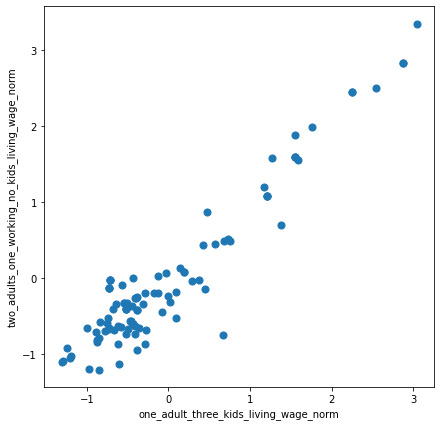

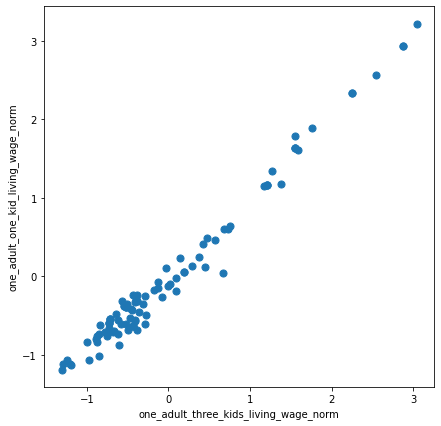

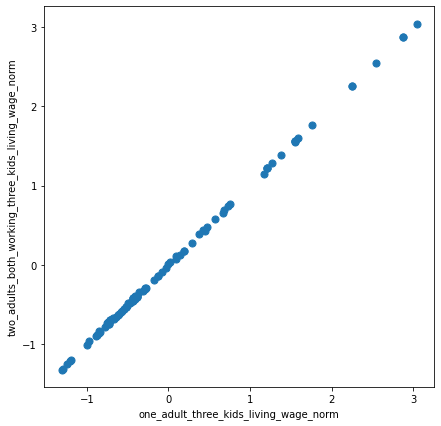

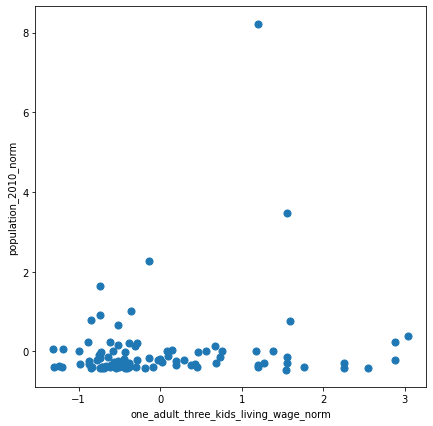

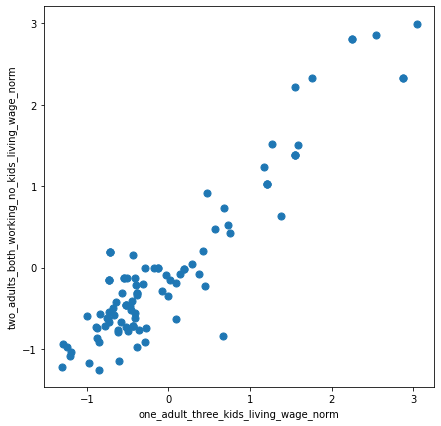

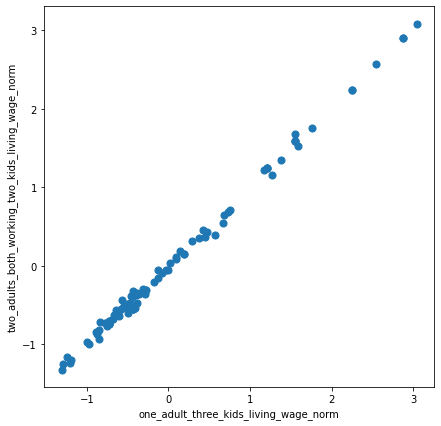

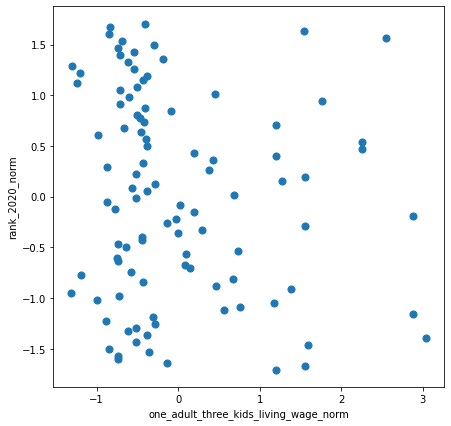

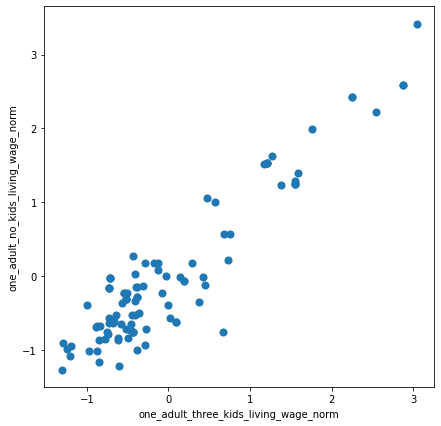

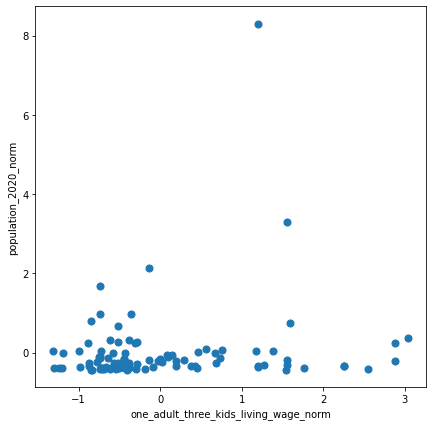

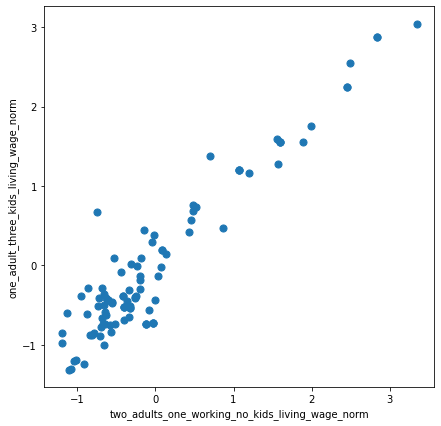

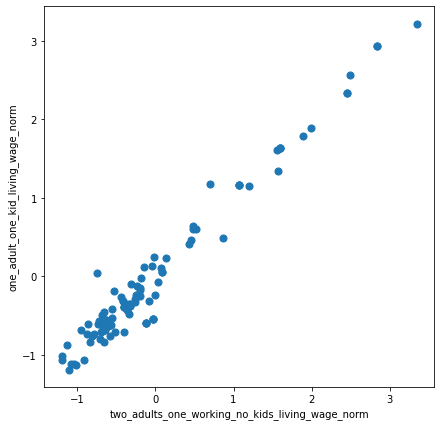

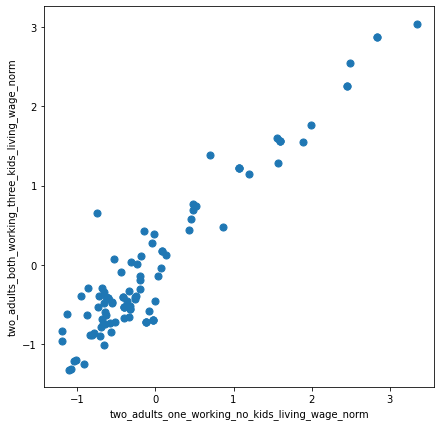

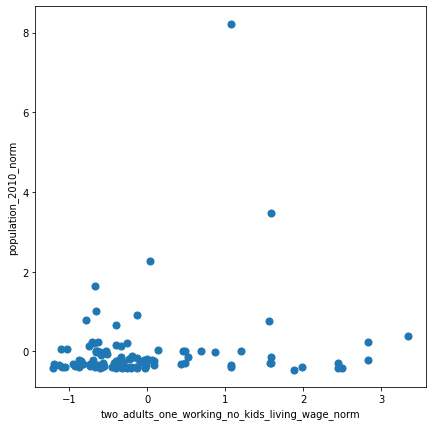

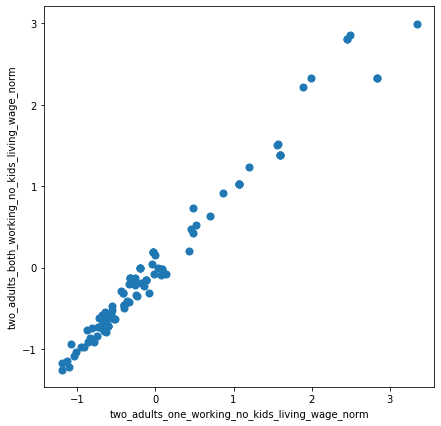

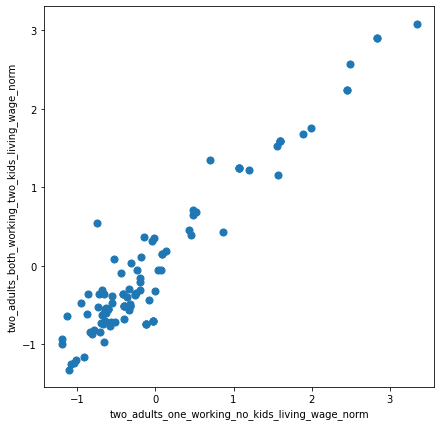

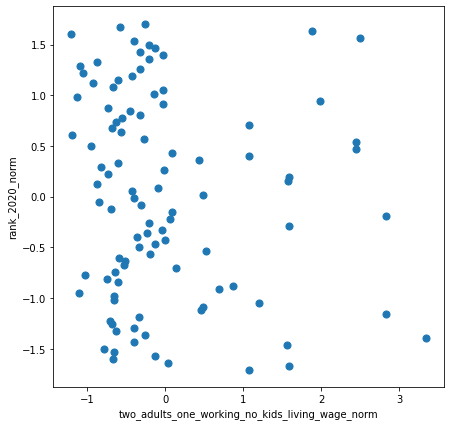

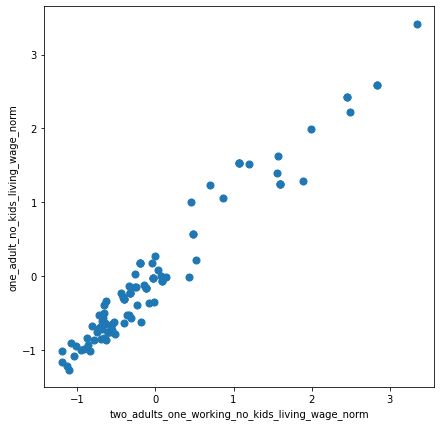

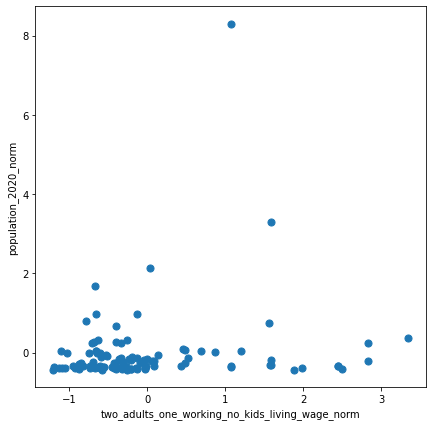

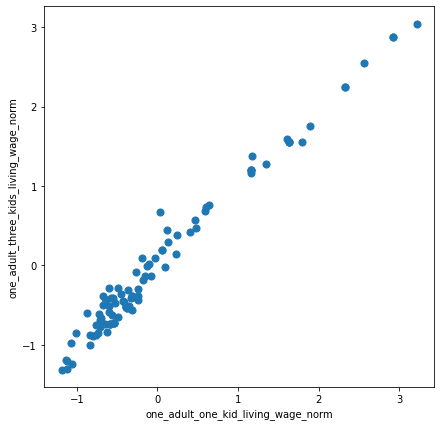

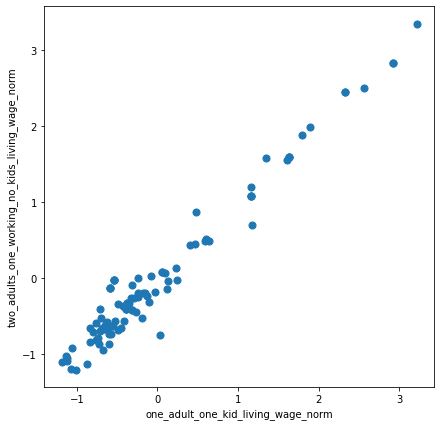

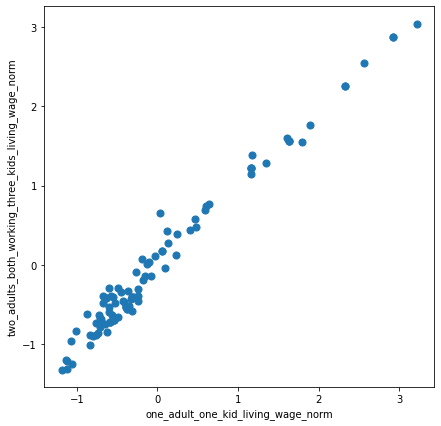

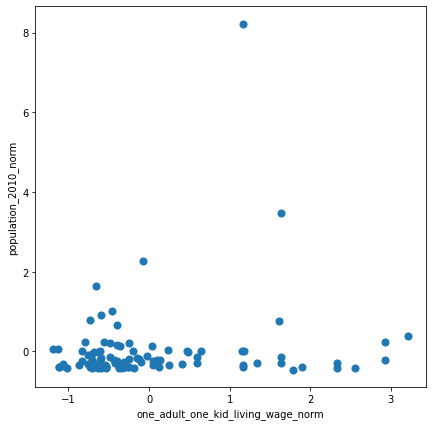

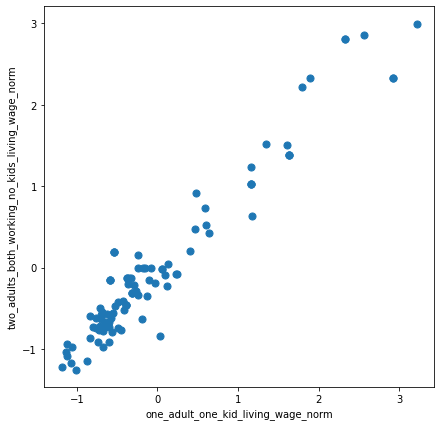

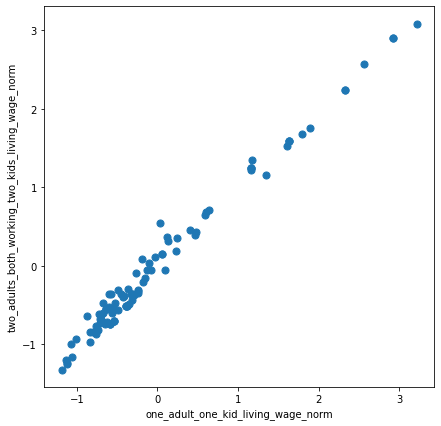

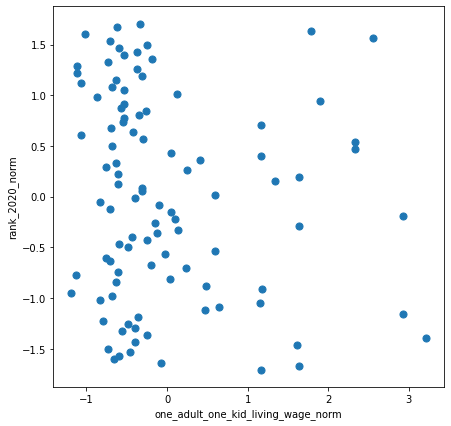

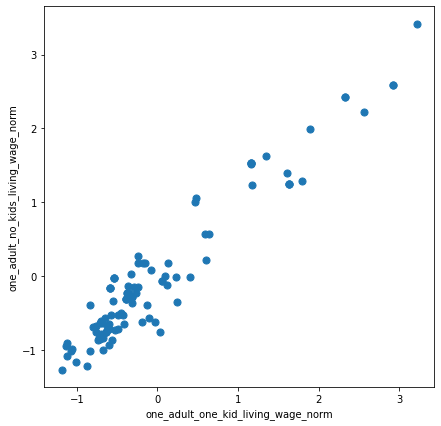

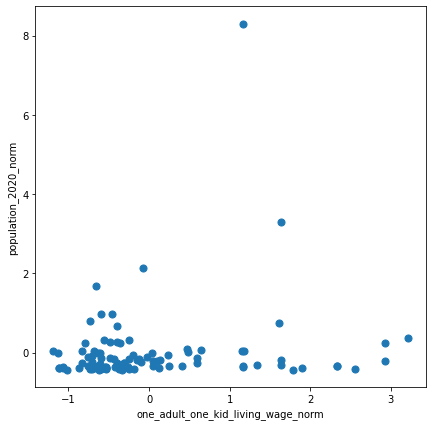

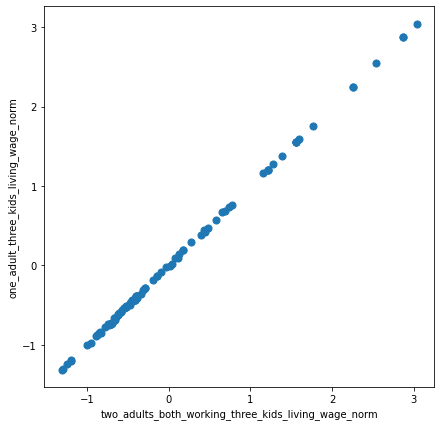

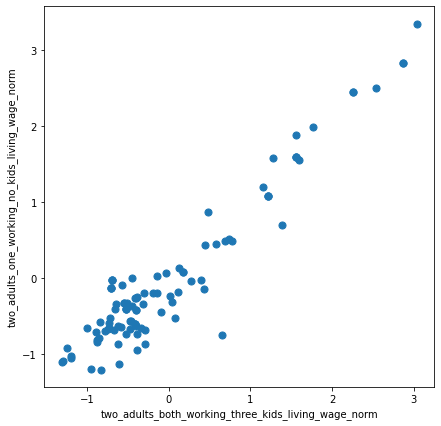

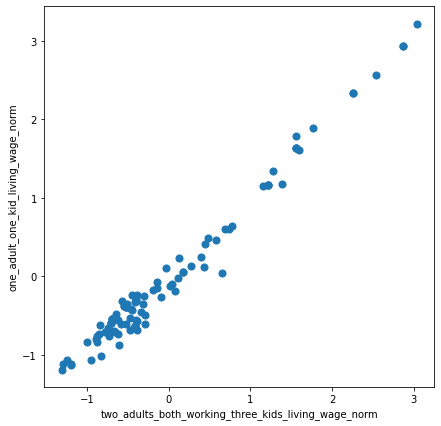

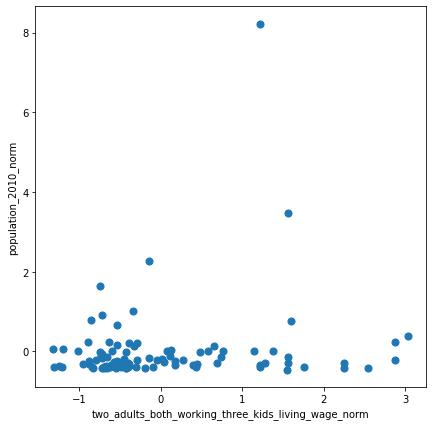

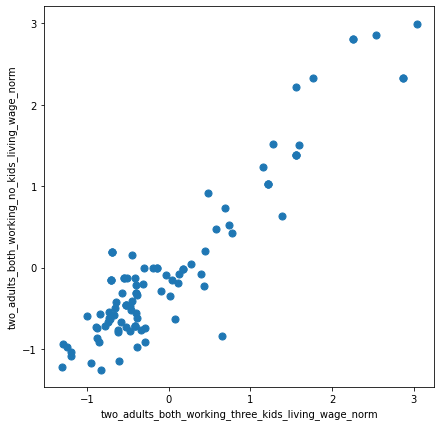

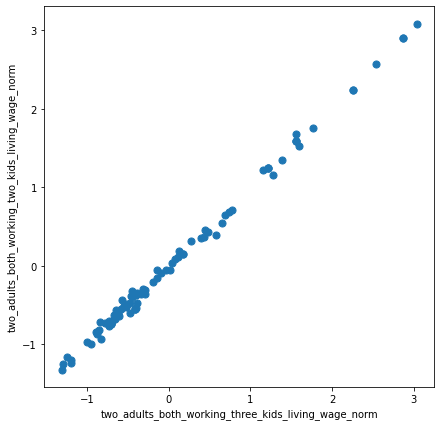

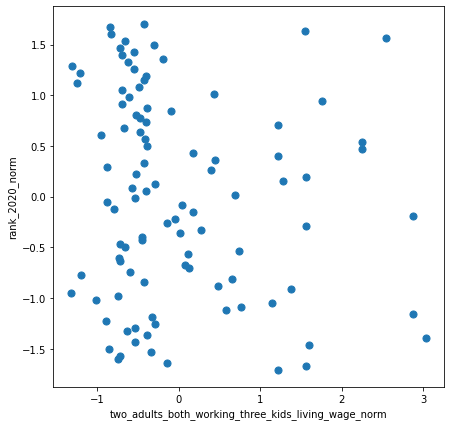

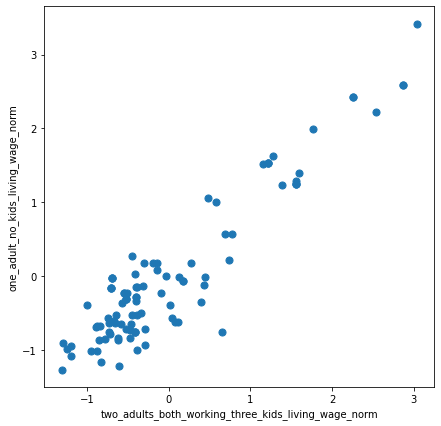

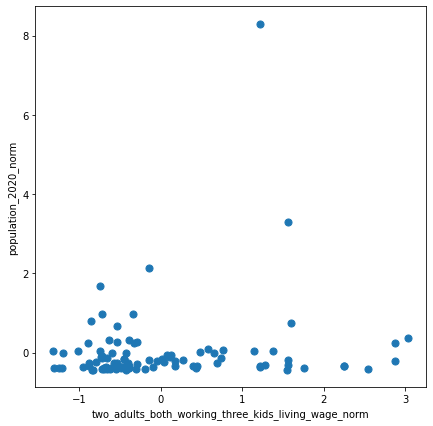

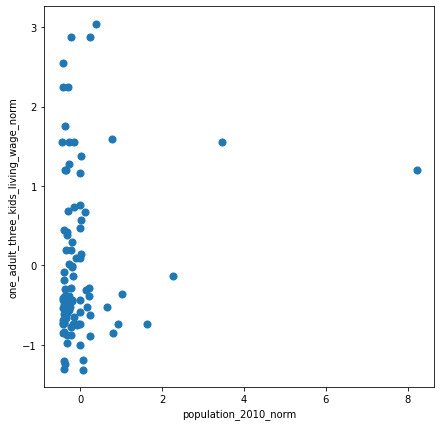

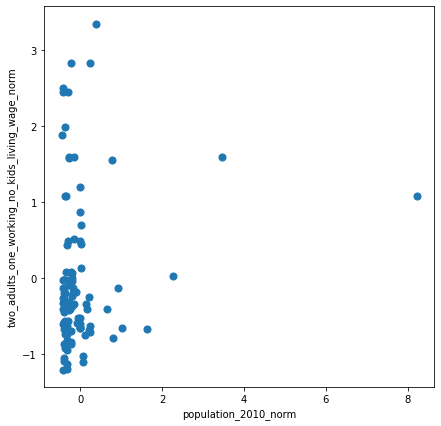

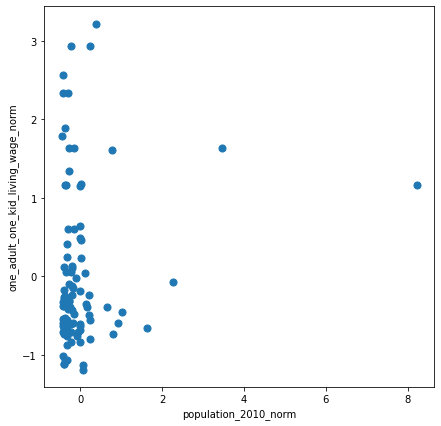

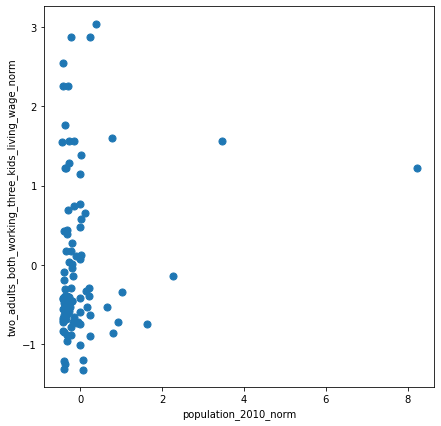

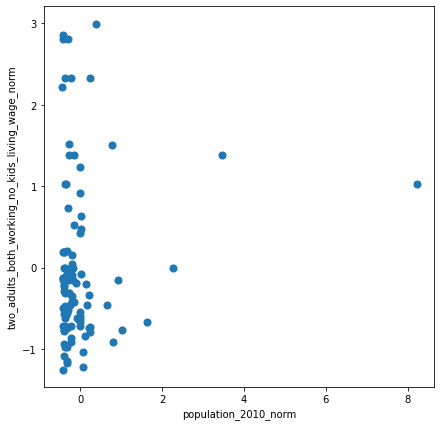

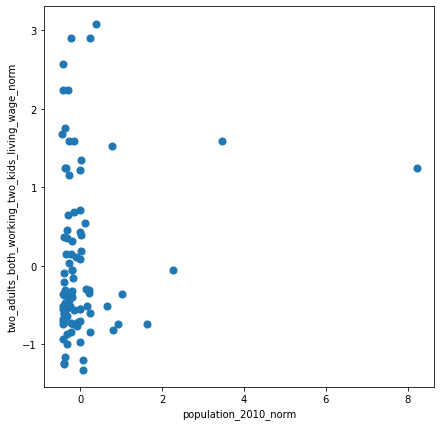

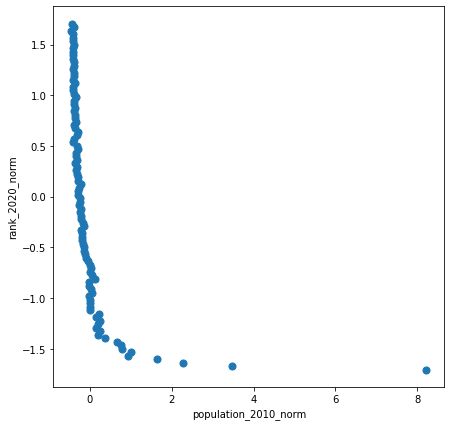

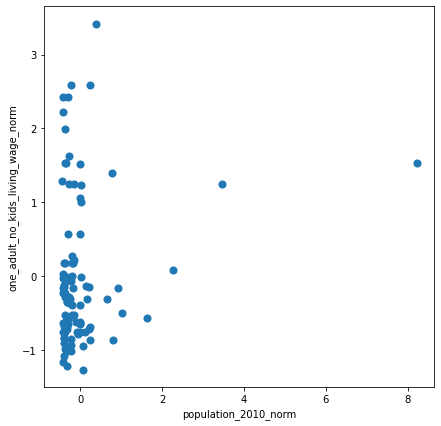

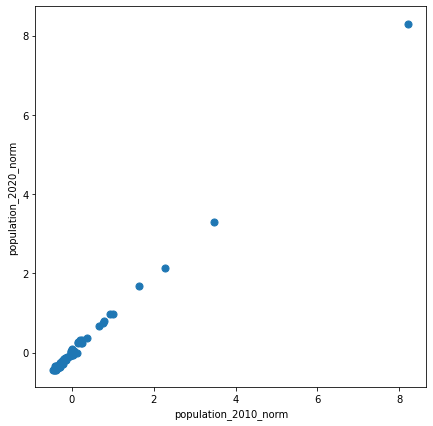

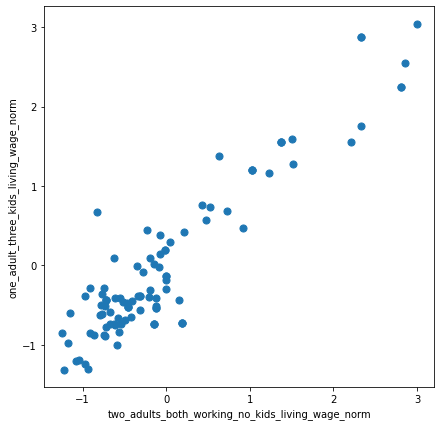

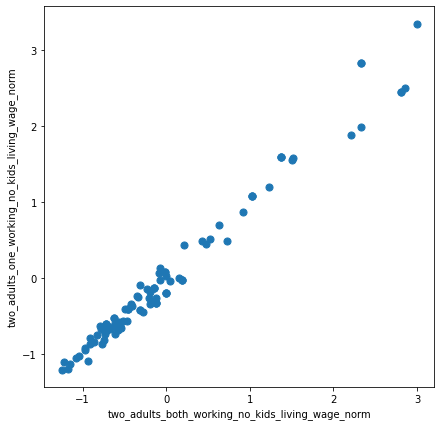

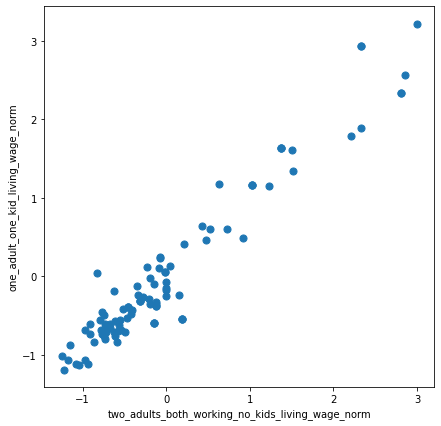

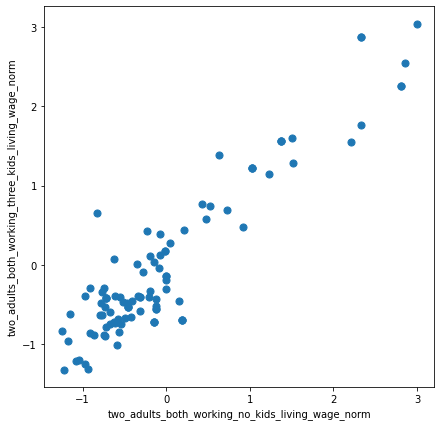

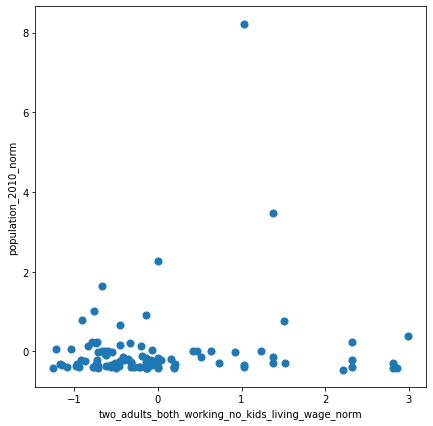

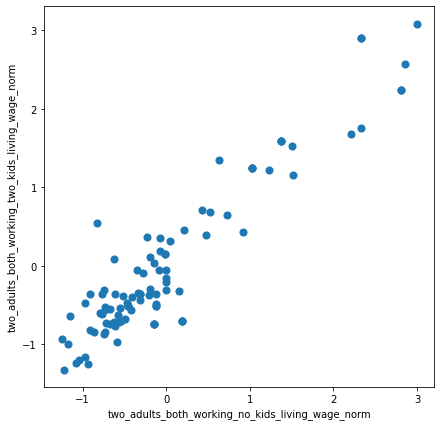

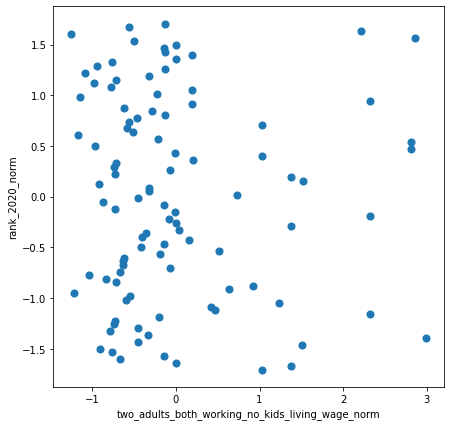

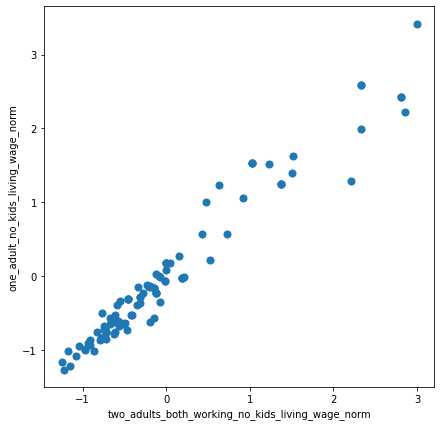

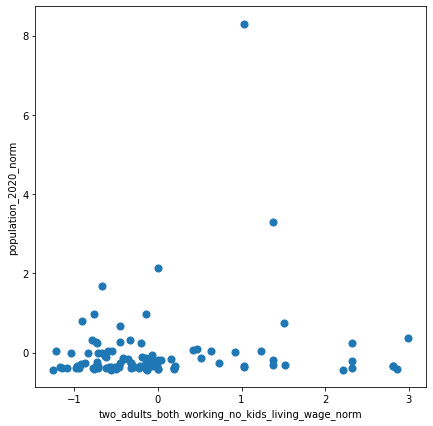

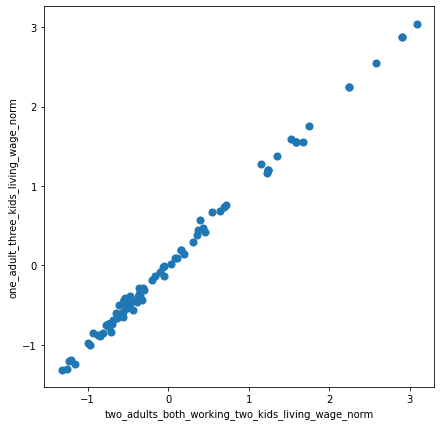

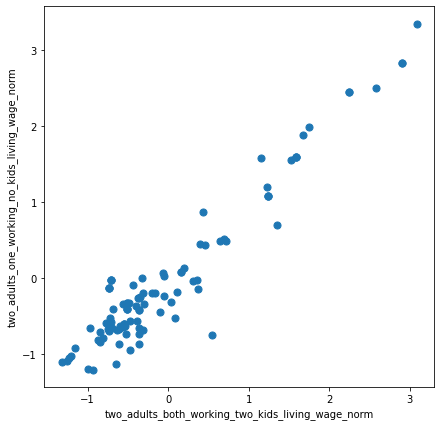

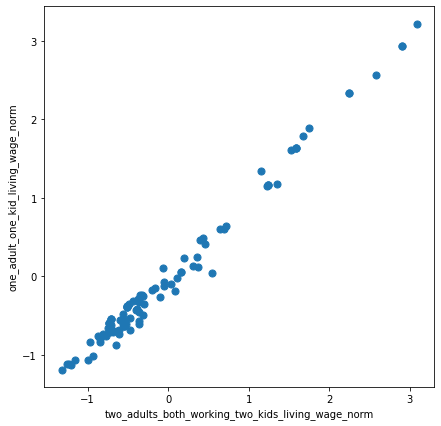

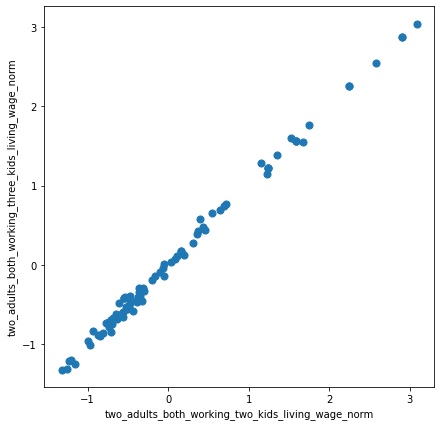

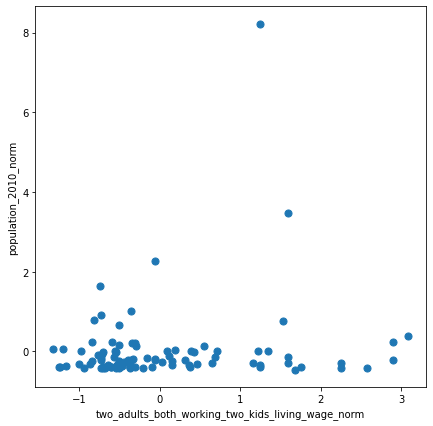

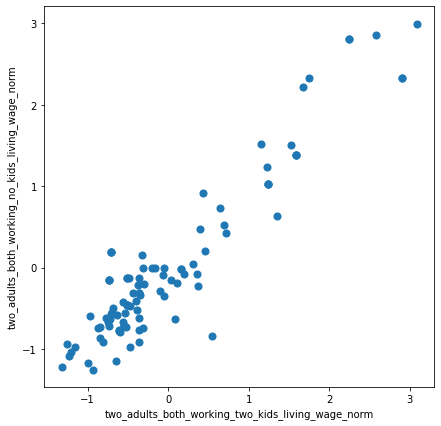

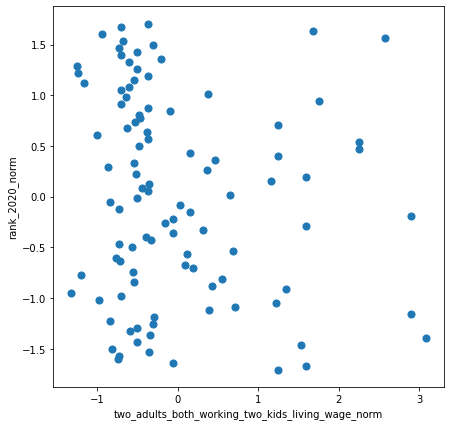

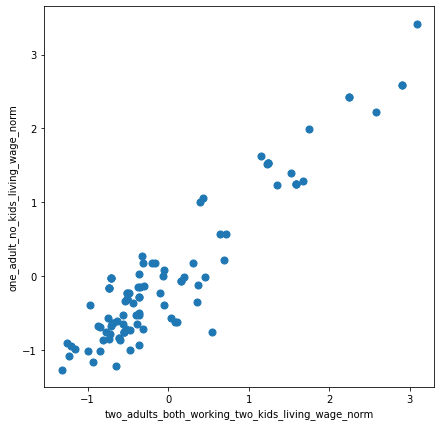

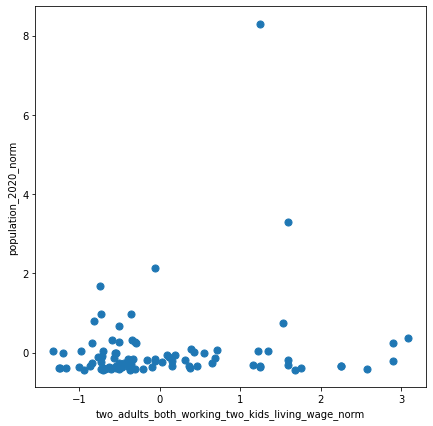

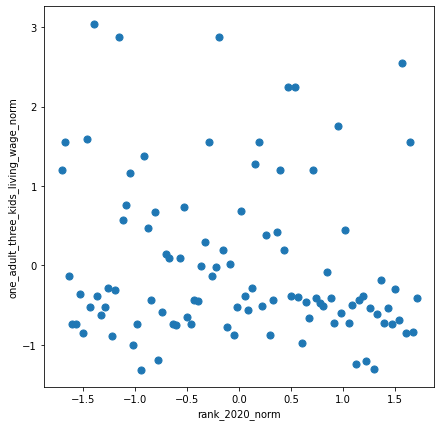

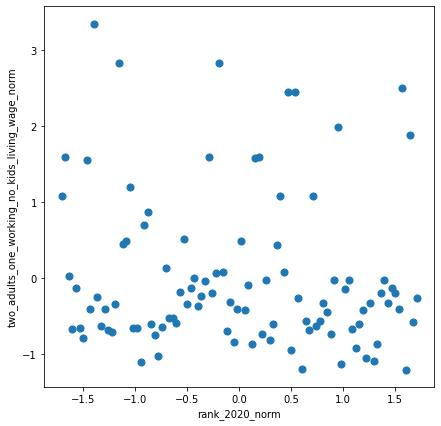

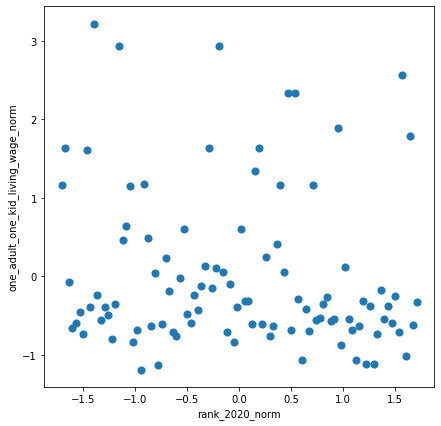

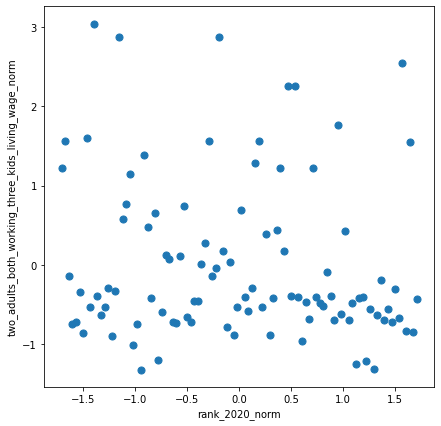

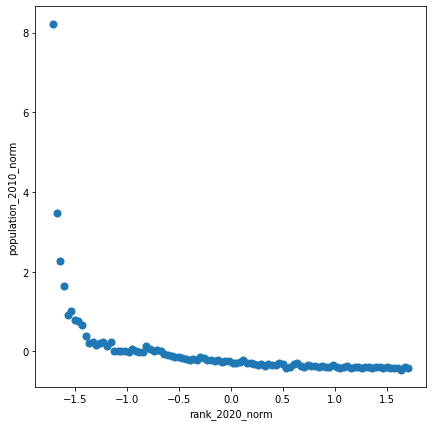

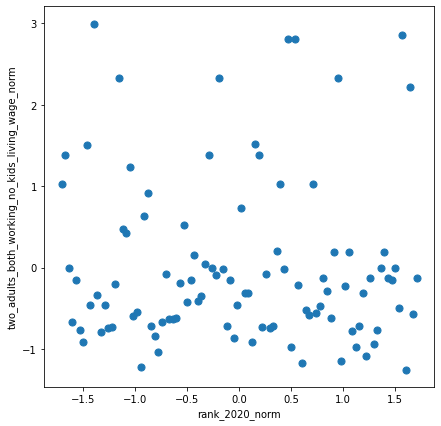

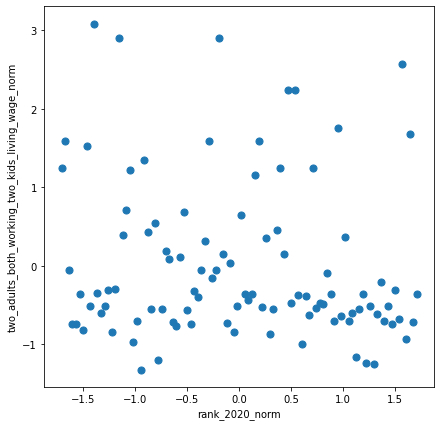

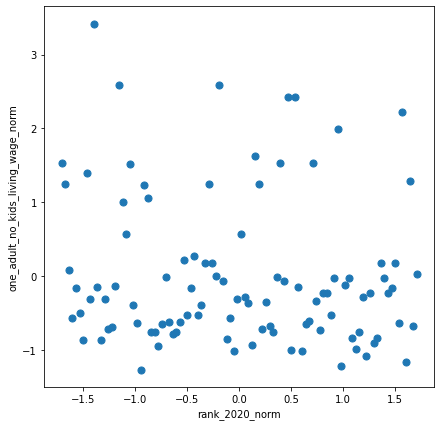

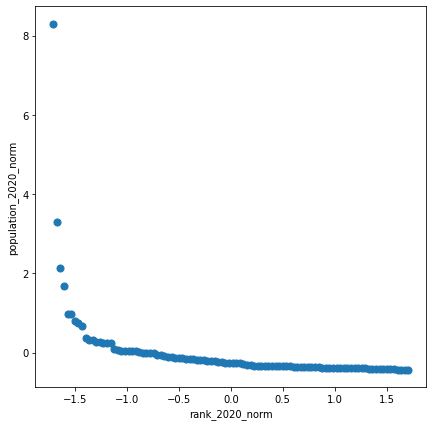

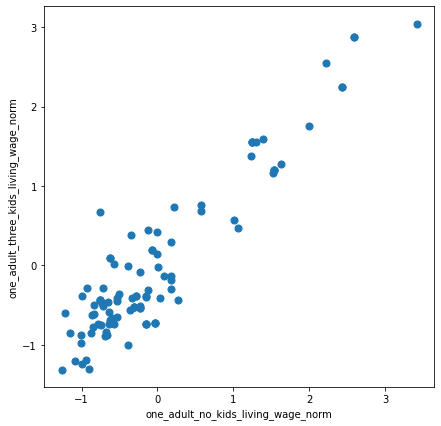

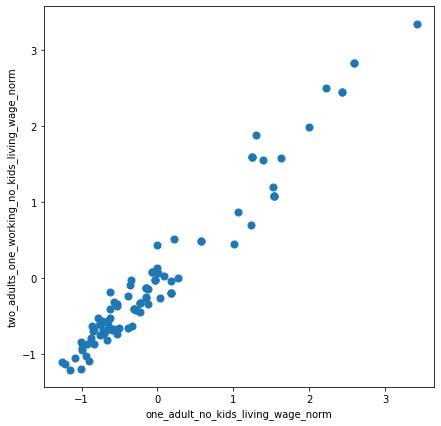

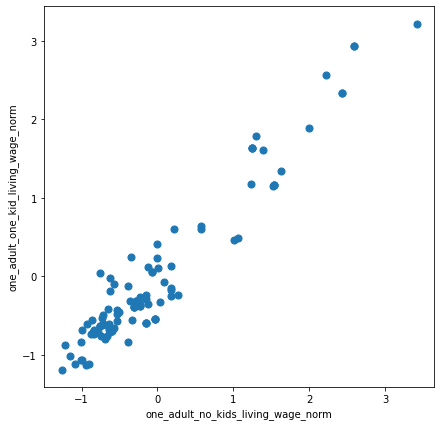

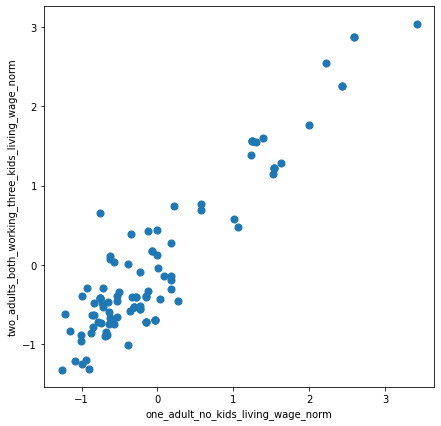

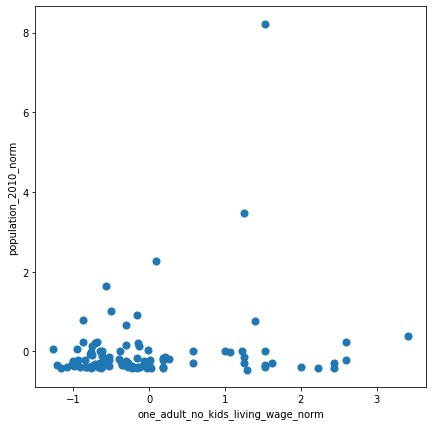

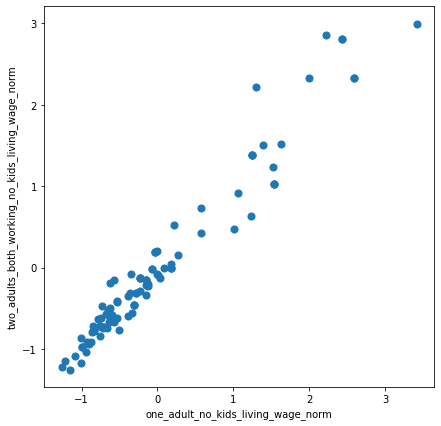

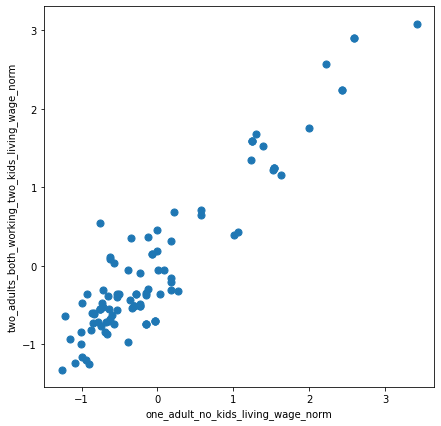

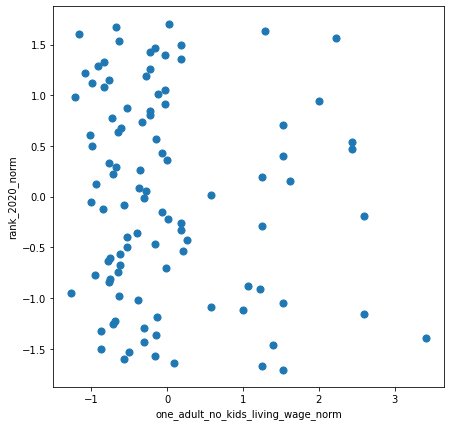

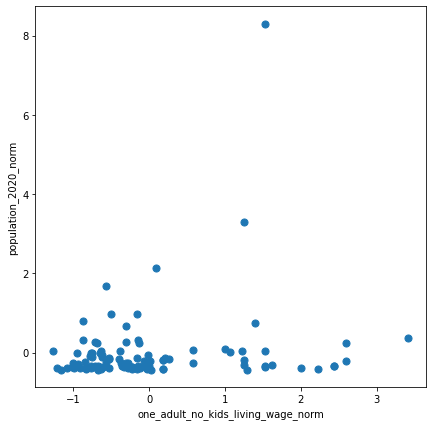

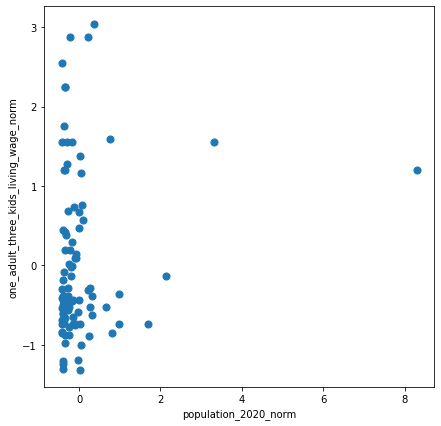

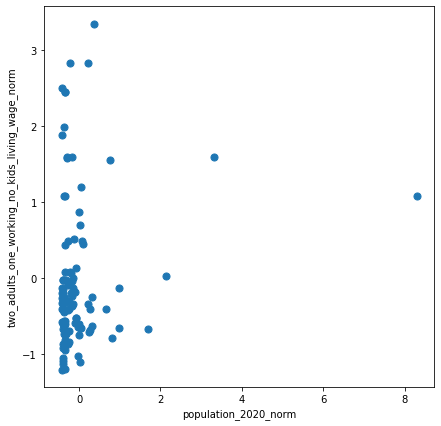

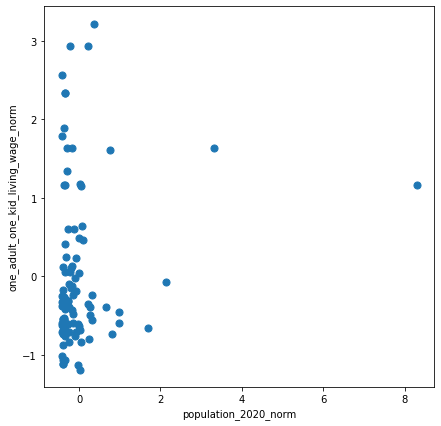

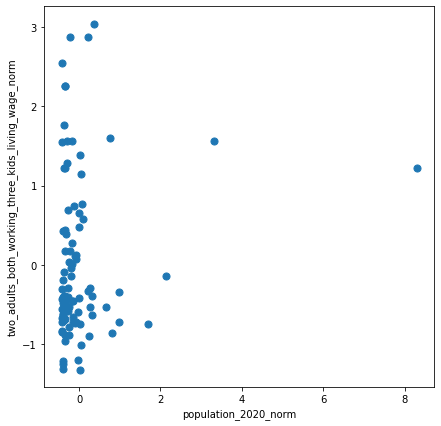

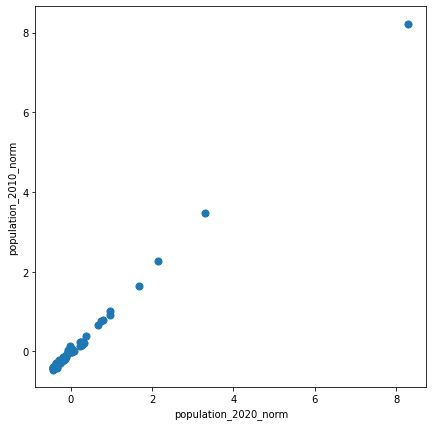

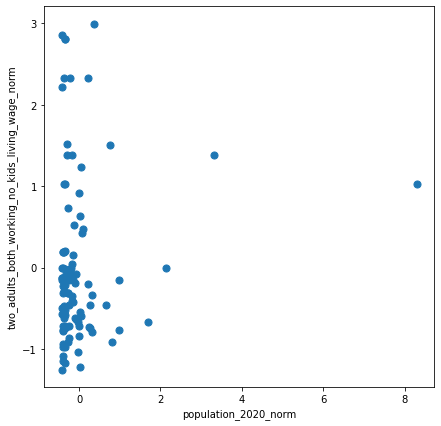

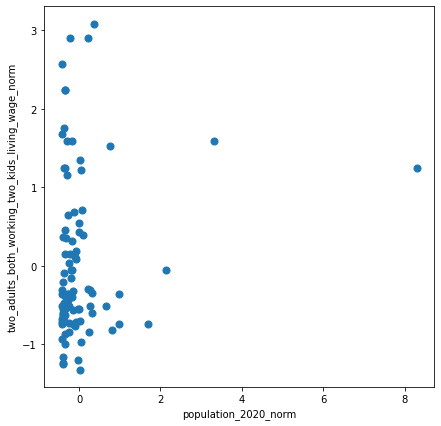

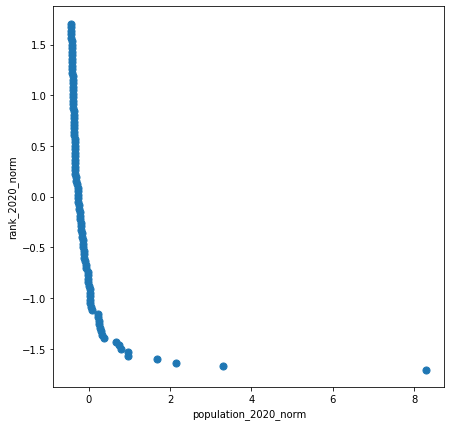

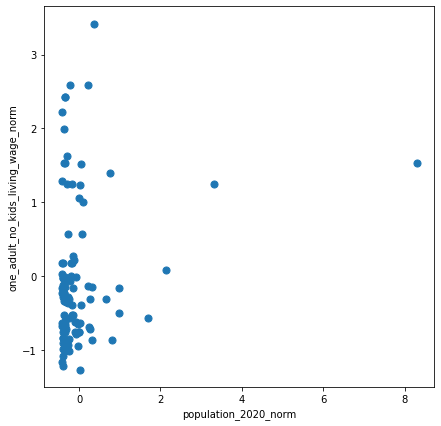

In [ ]:
makePlots(dataframe_)

The K-means clustering algorithm can be written either using numpy or using the sklearn library.
The sklearn library provides a simple implementation using a few lines of codes.

The initial excercise that students work on involves a few lines of code that enables clustering using sklaern library.

### ************ Write Code for K-Means Clustering using SK Learn library ****************

In [ ]:

def kmeansClustering(num_clusters,kmeansDataFrame,random_state=42):
    
    # Generate the k-means clusters with the number of clusters = num_clusters
    
    # Subset the dataframe to select only the numerical features
    kmeansDataFrame_ = kmeansDataFrame[[colName for colName in list(kmeansDataFrame.describe().columns) if '_norm' in colName]]
    
    
    # Initialize the Kmeans algorithm with a specified number of clusters
    kmeans = KMeans(n_clusters= num_clusters,random_state=random_state)
    
    # Fit the dataset to the Kmeans clustering algorithm
    kmeans.fit(kmeansDataFrame_)
    
    # Predict the cluster value for each of the datapoint
    y_kmeans = kmeans.predict(kmeansDataFrame_)
    
    return y_kmeans,kmeans

In [ ]:
y_Kmeans,_ = kmeansClustering(8,dataframe_)

### Run the cell below and verify that it passed all the unit test before continuing

In [ ]:
_validateKmeansClustering(kmeansClustering)

Passed all the unit Test........


We can make the plot using the makePlots function above and pass in the cluster values predicted by the kmeansClustering algorithm.

### ****** Write code to plot graph with the cluster values **********

<ipython-input-12-ba022647296e>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,7))


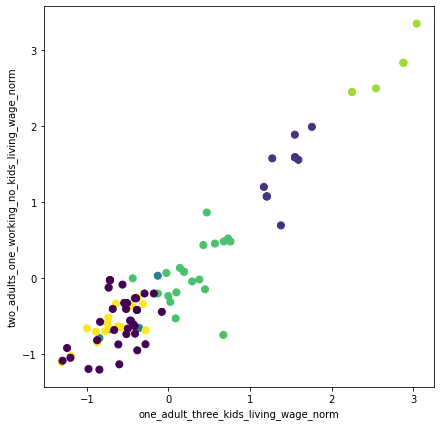

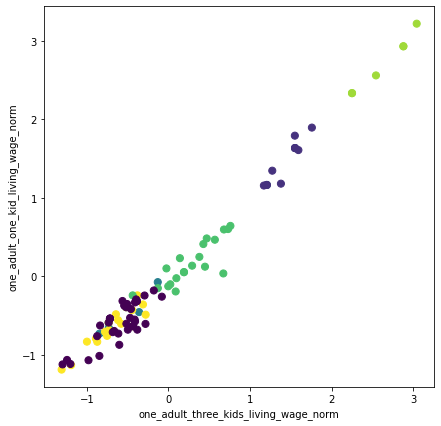

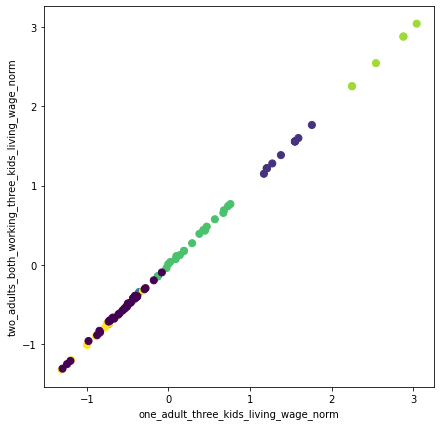

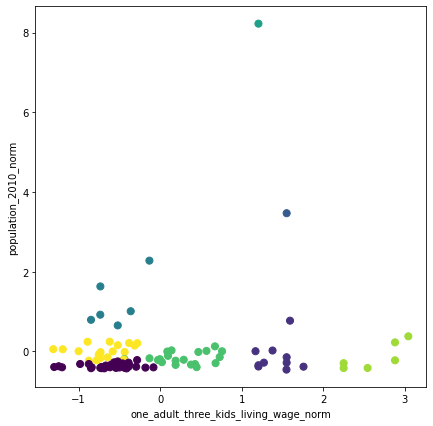

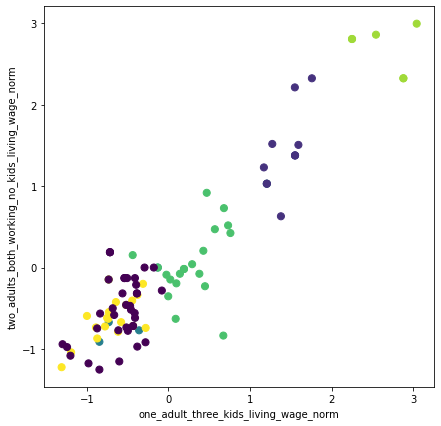

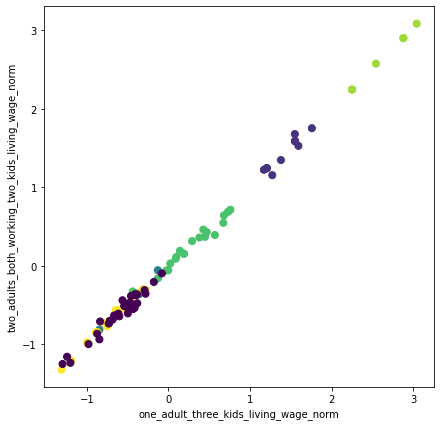

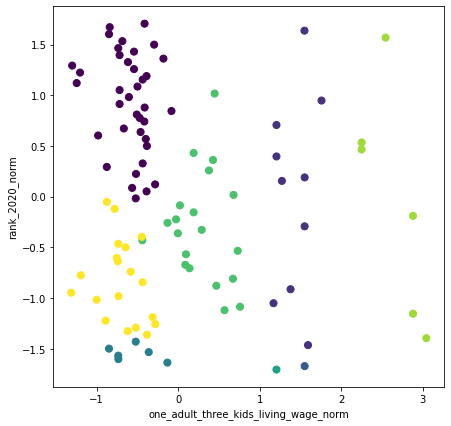

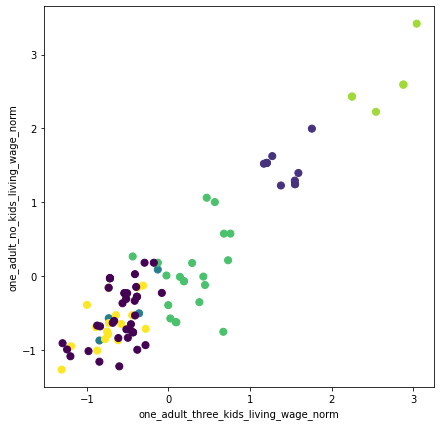

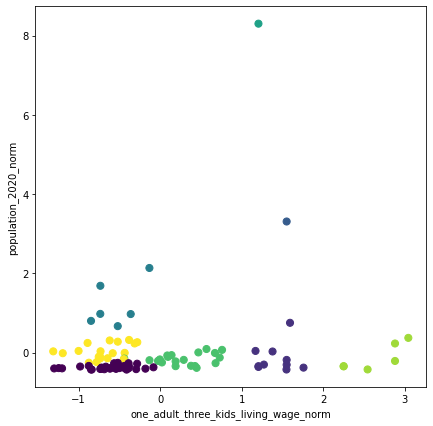

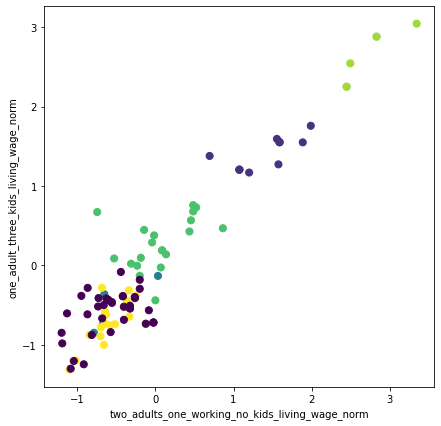

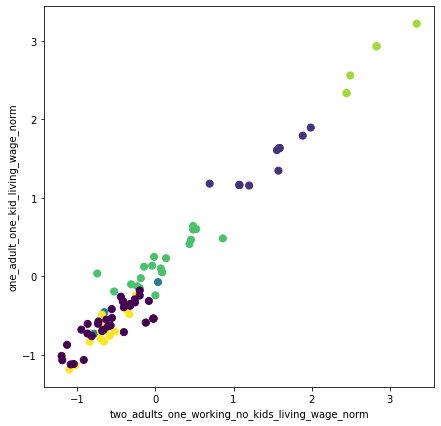

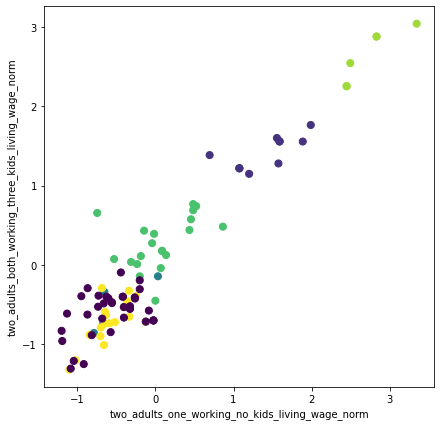

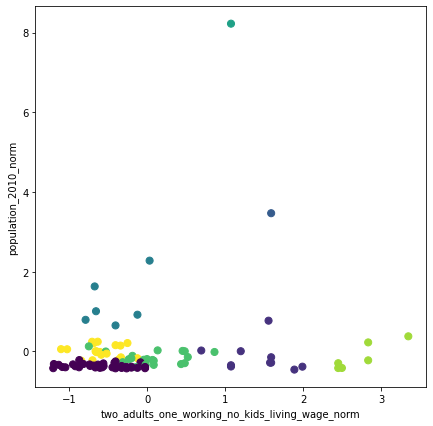

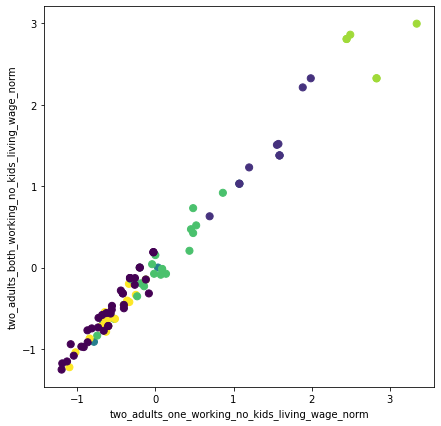

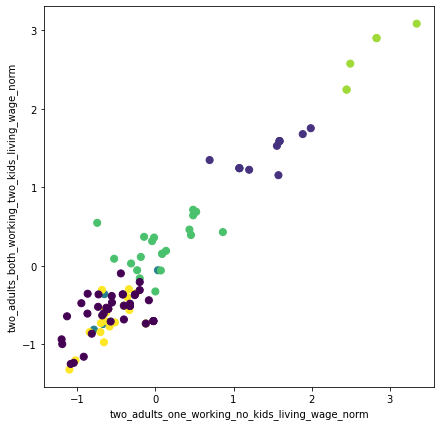

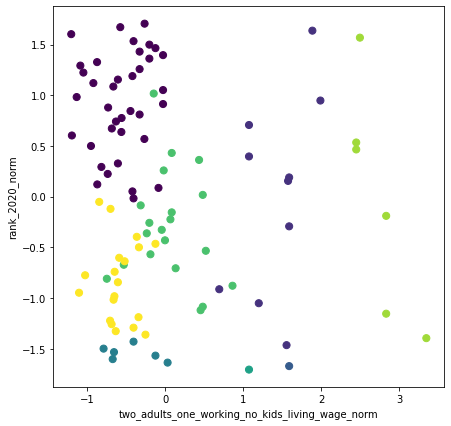

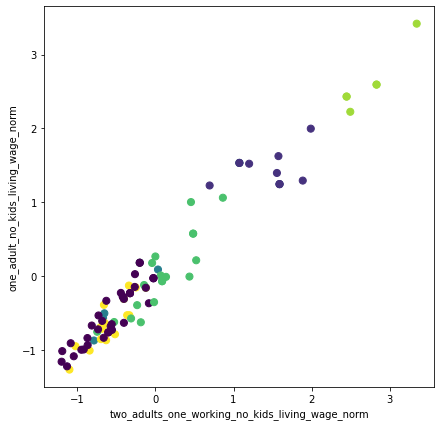

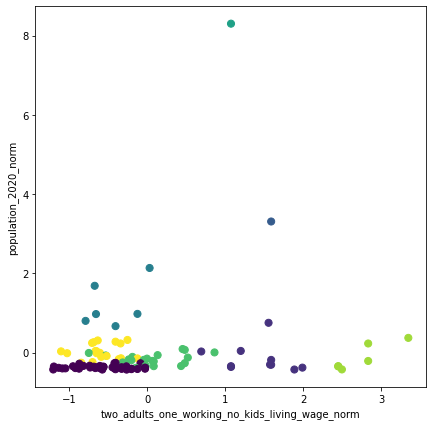

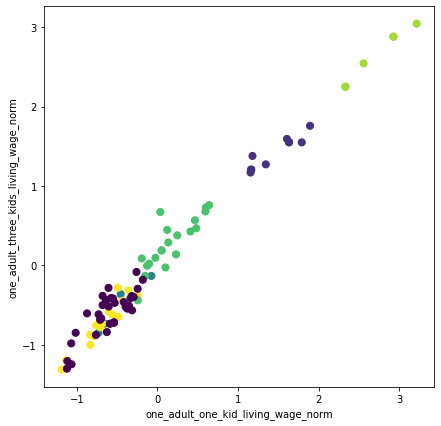

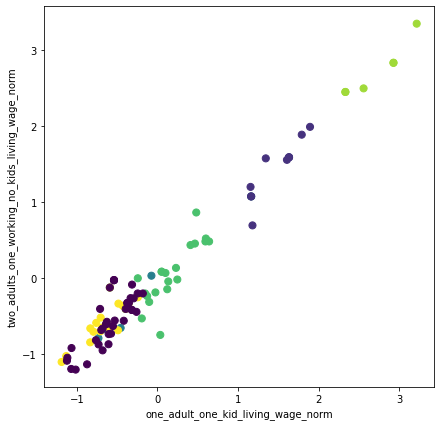

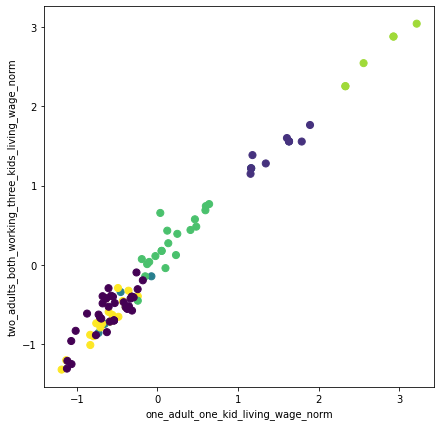

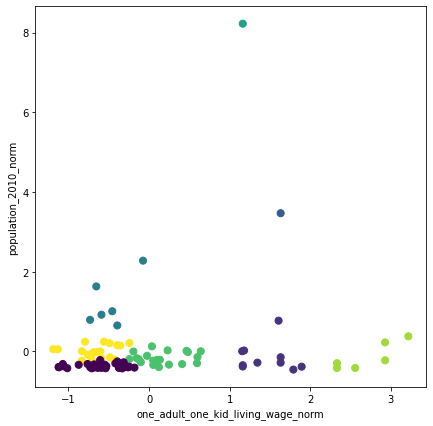

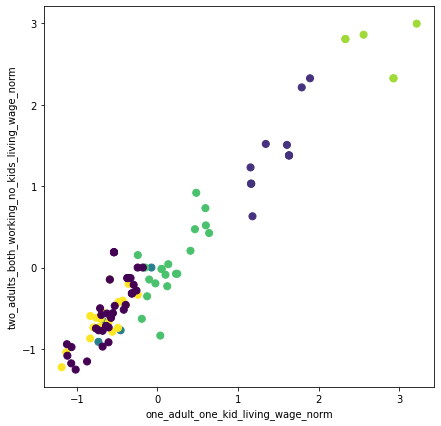

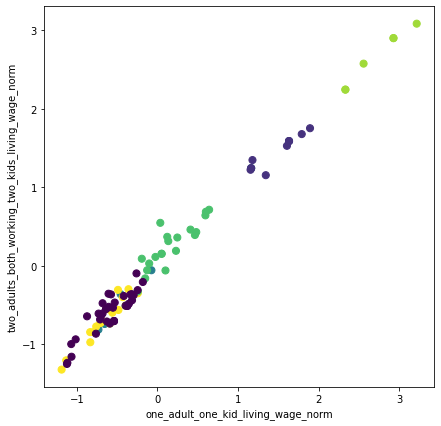

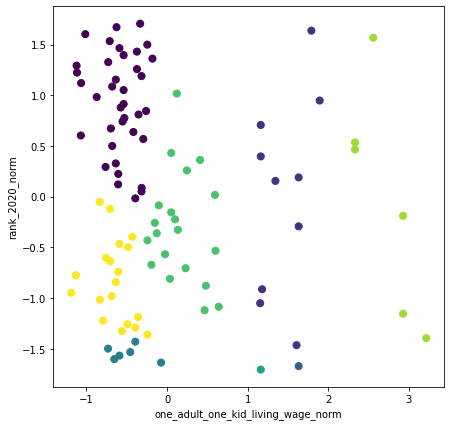

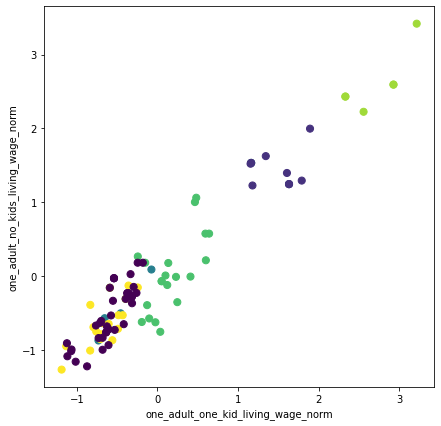

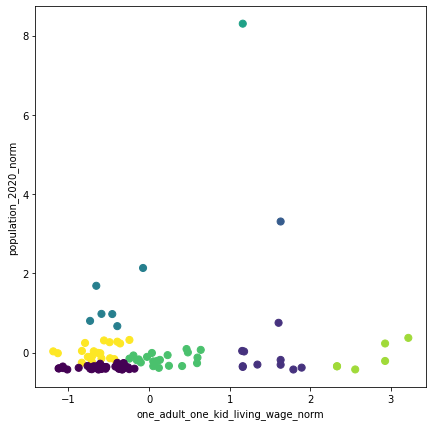

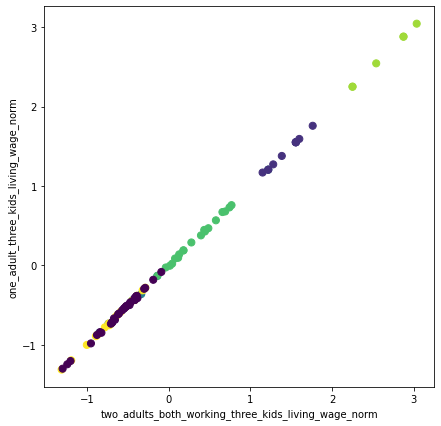

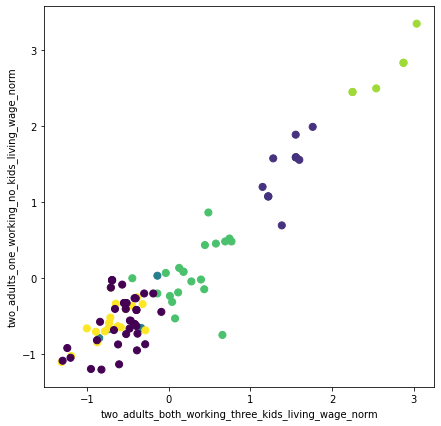

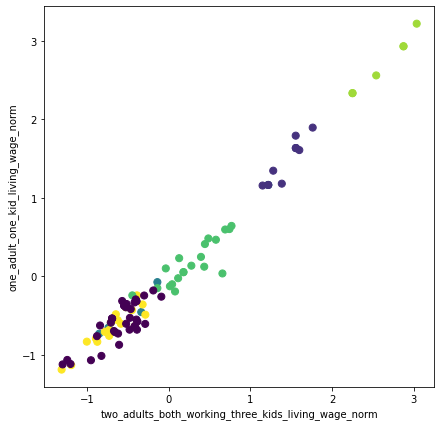

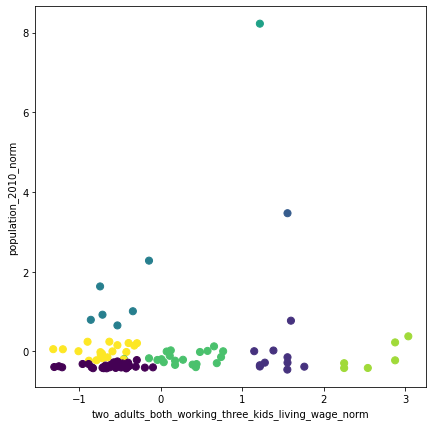

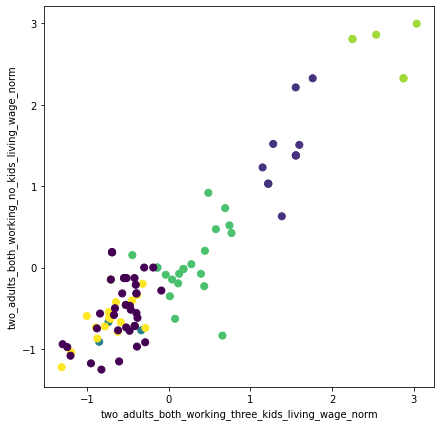

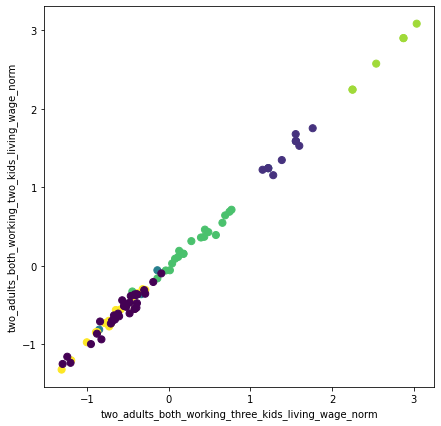

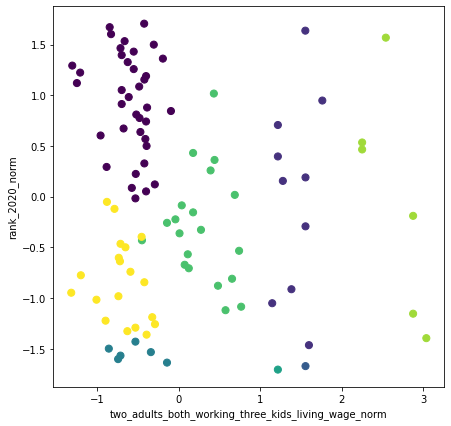

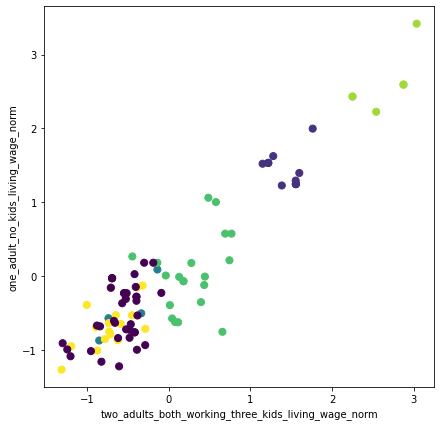

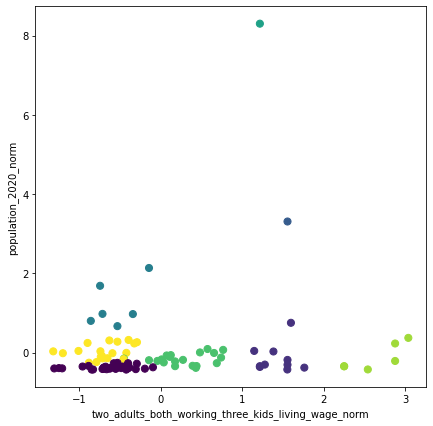

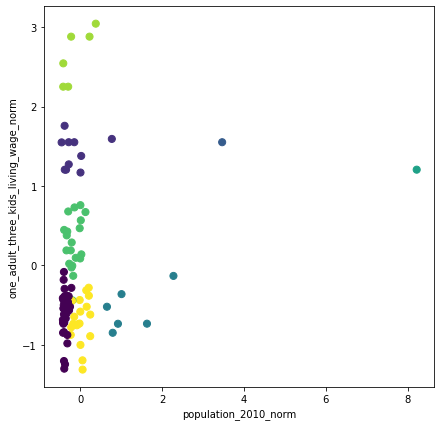

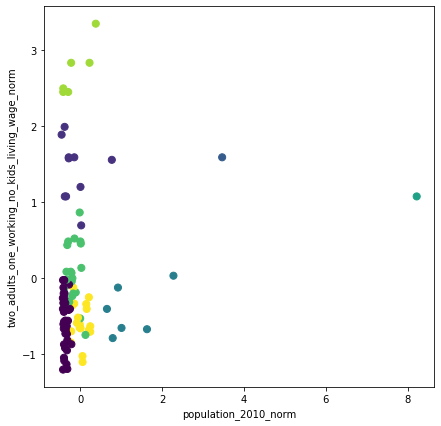

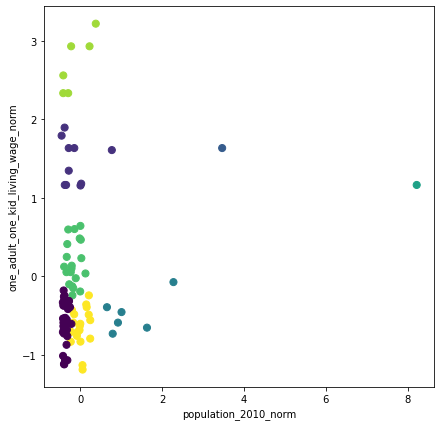

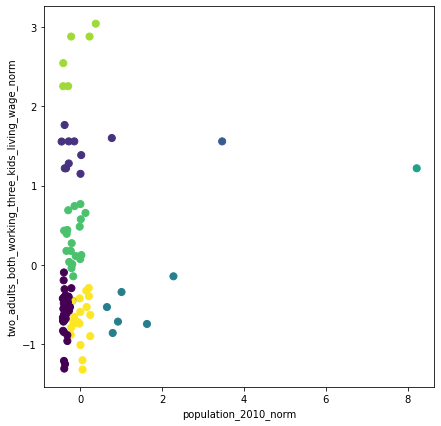

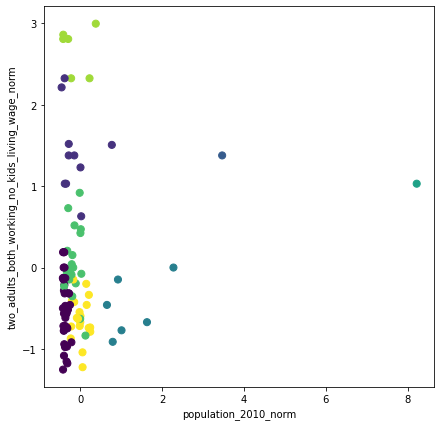

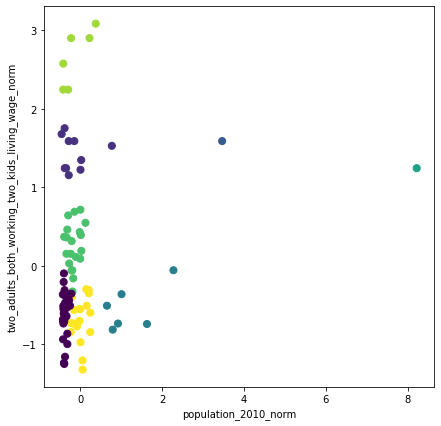

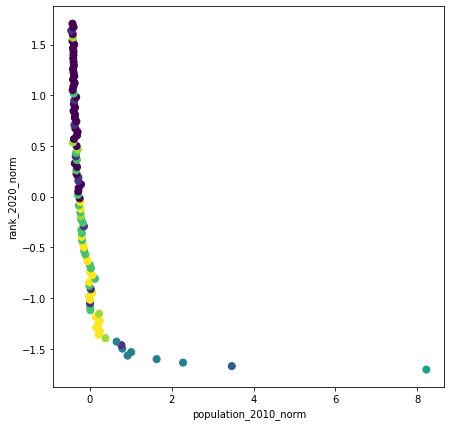

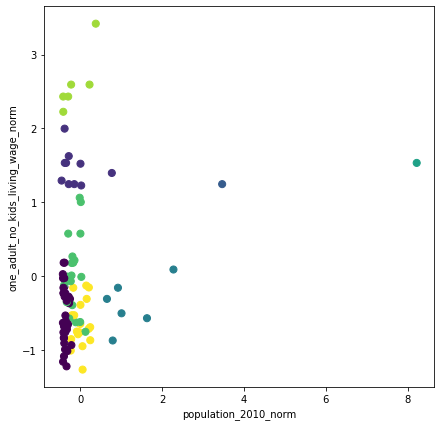

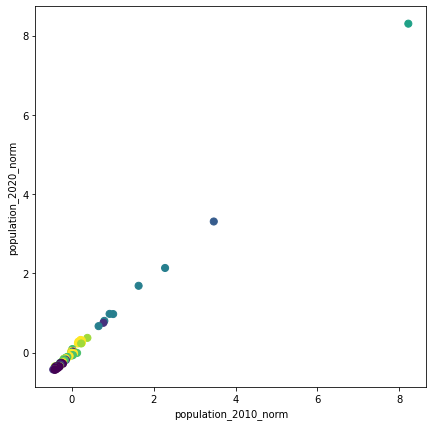

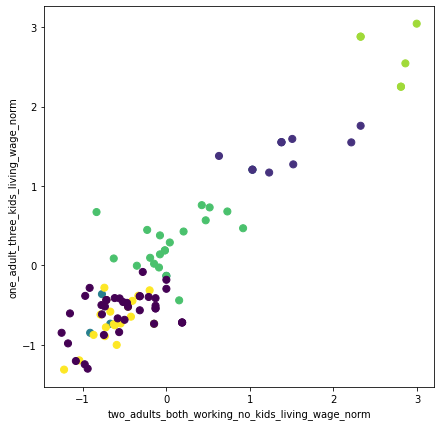

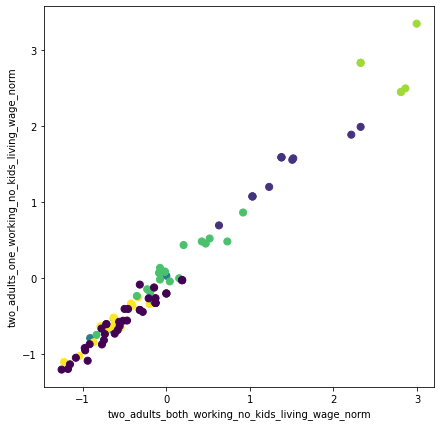

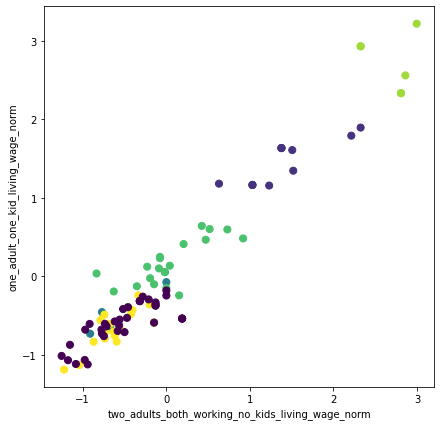

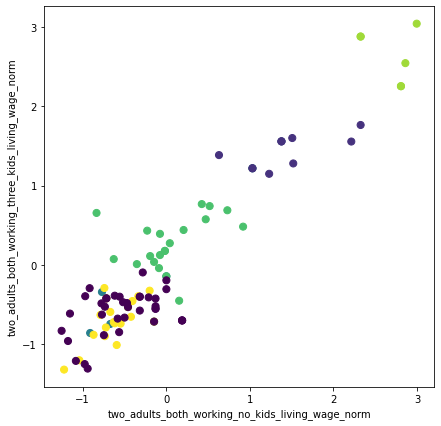

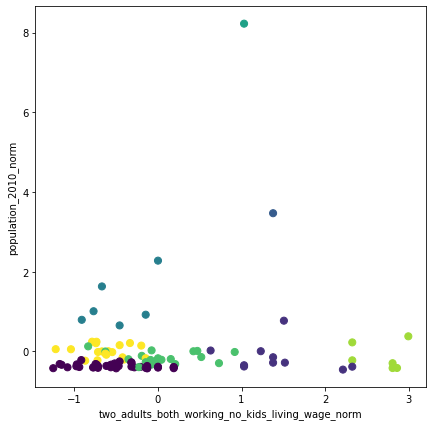

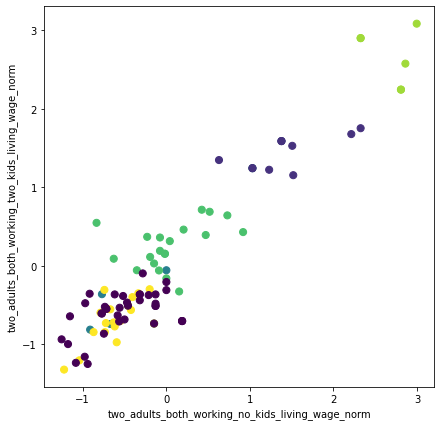

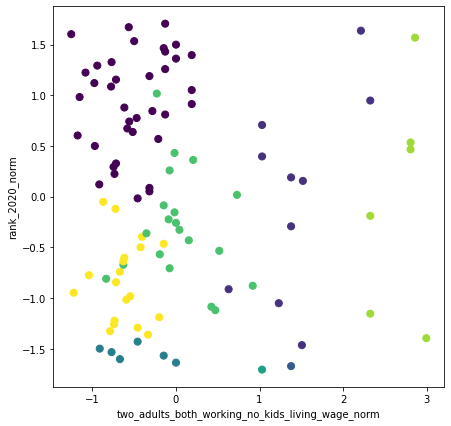

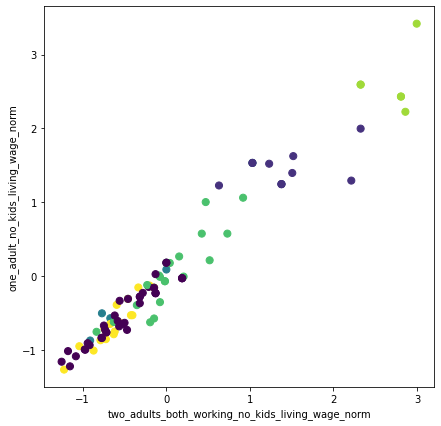

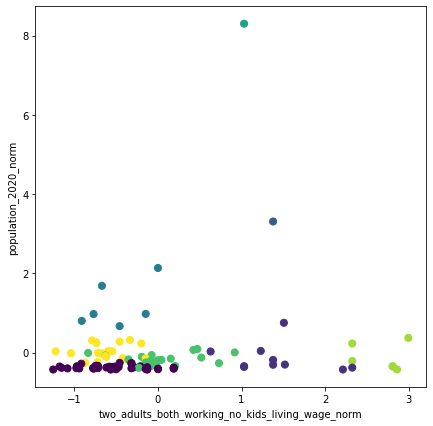

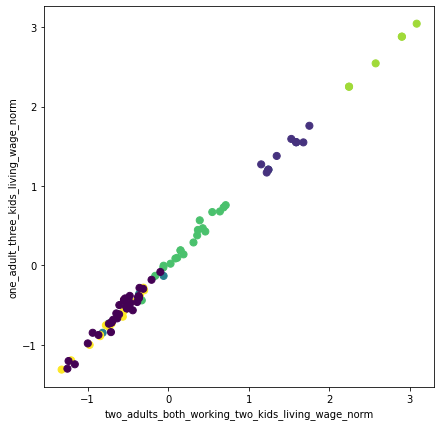

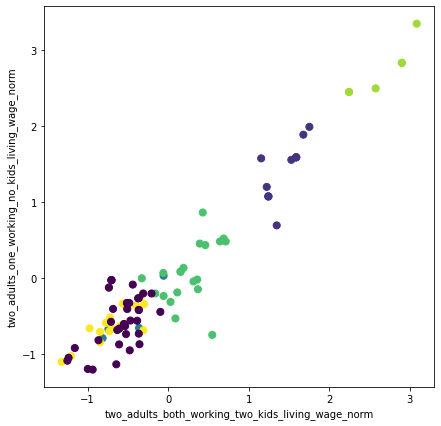

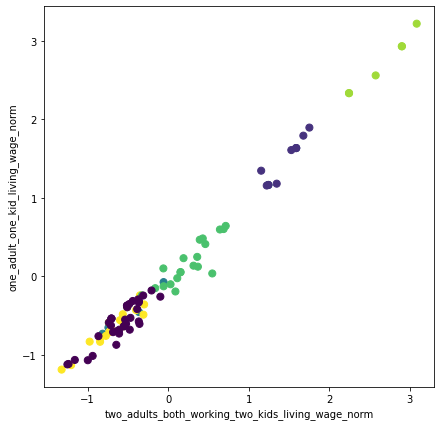

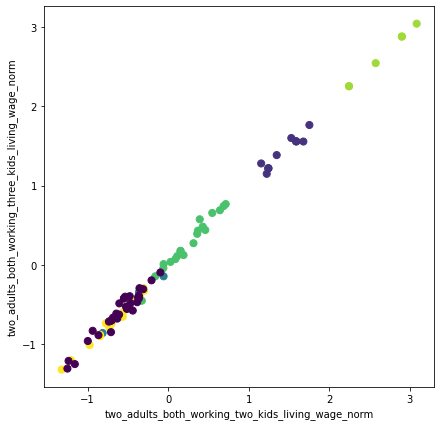

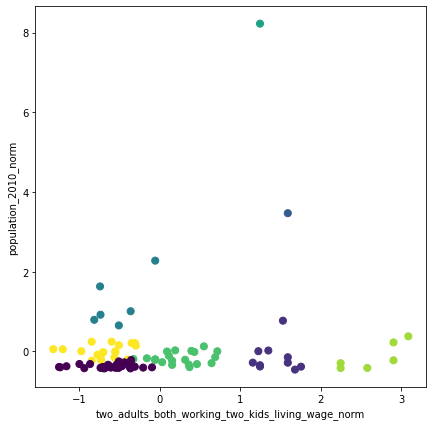

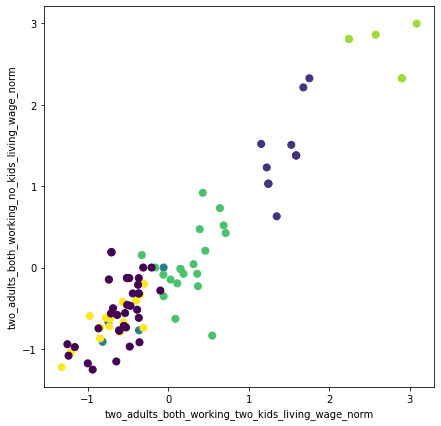

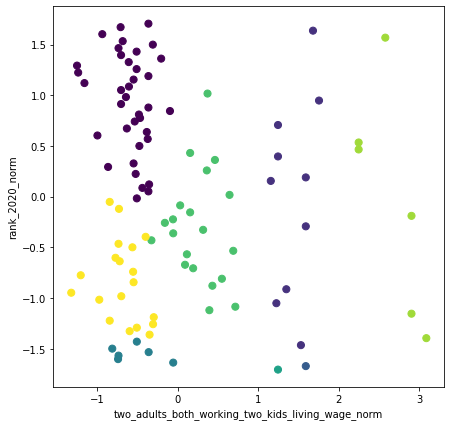

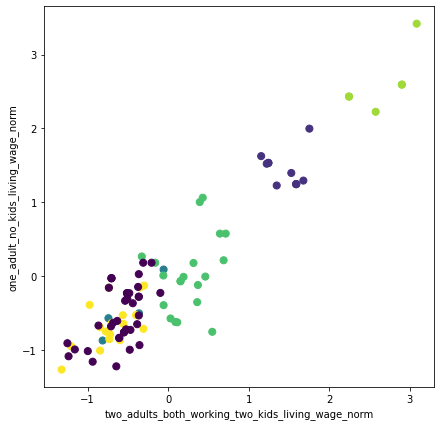

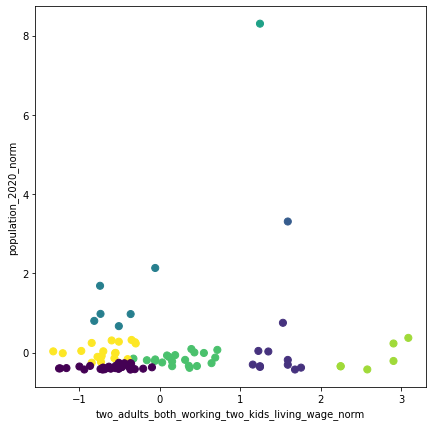

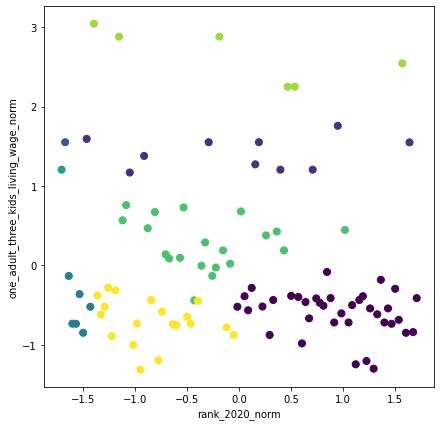

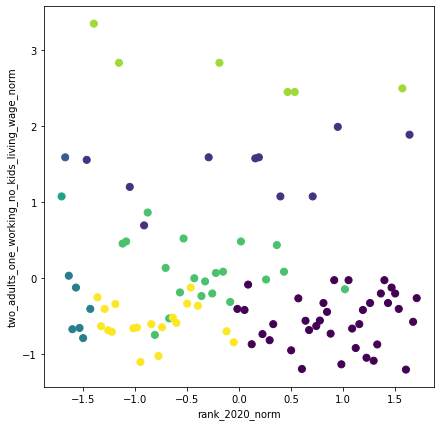

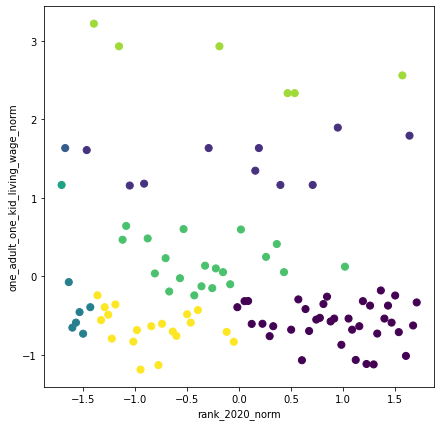

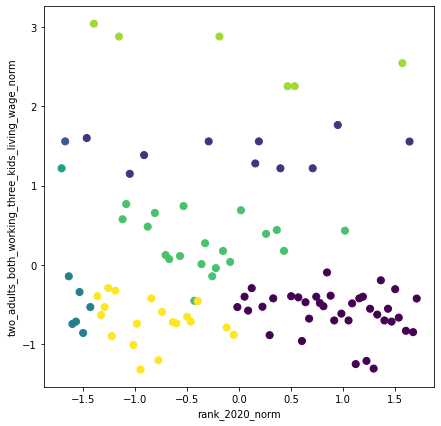

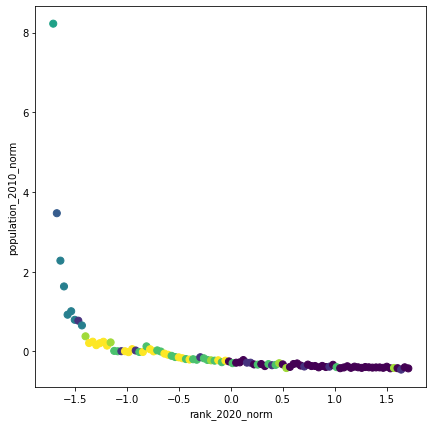

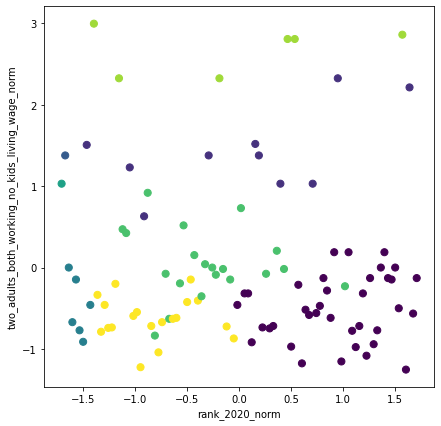

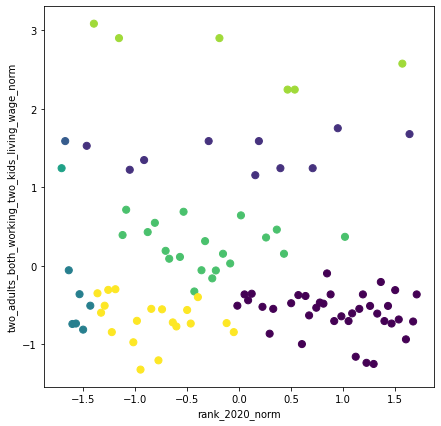

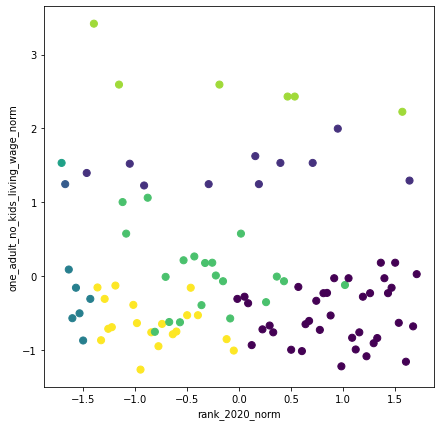

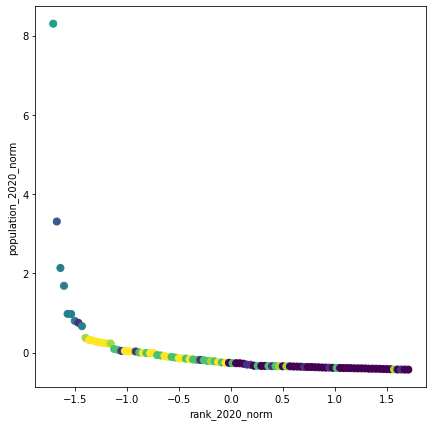

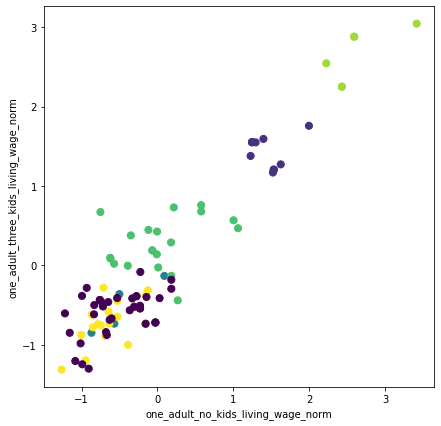

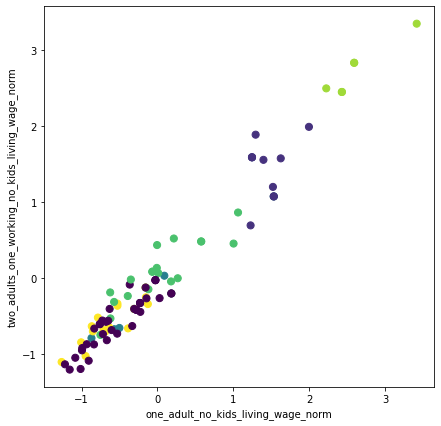

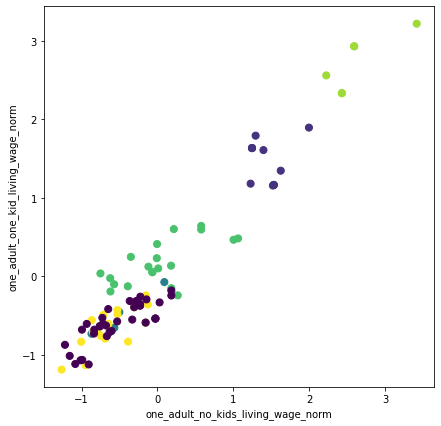

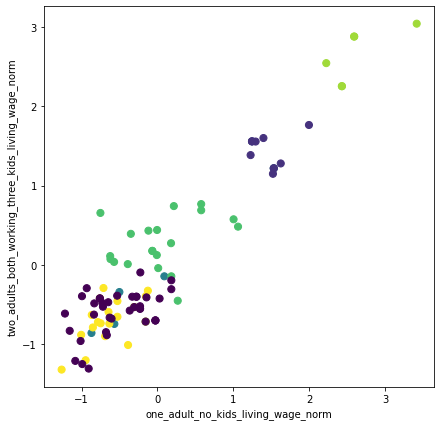

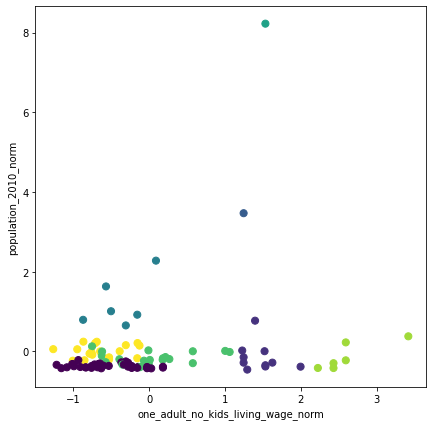

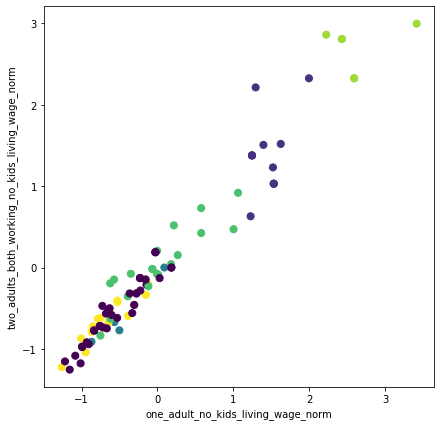

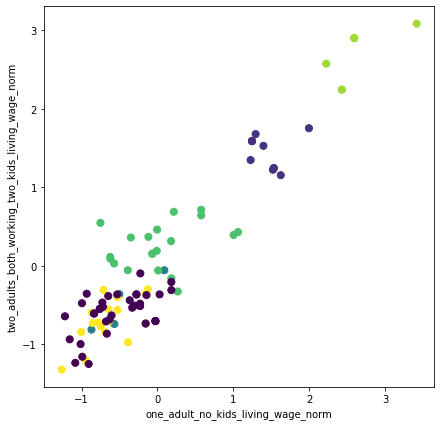

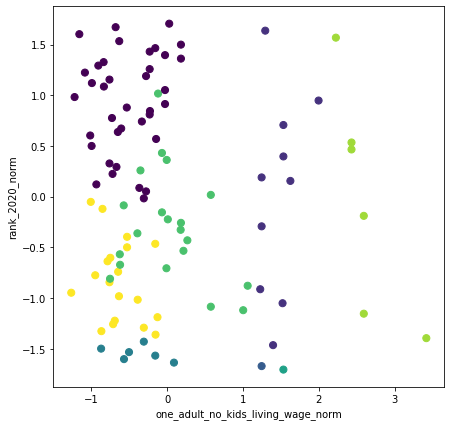

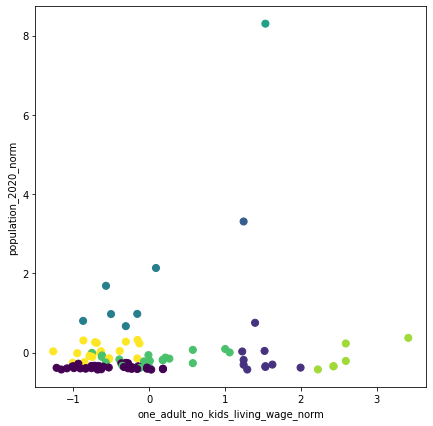

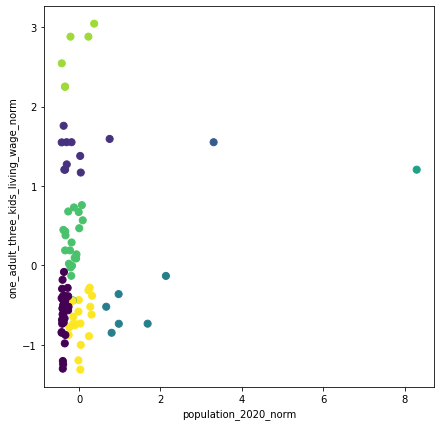

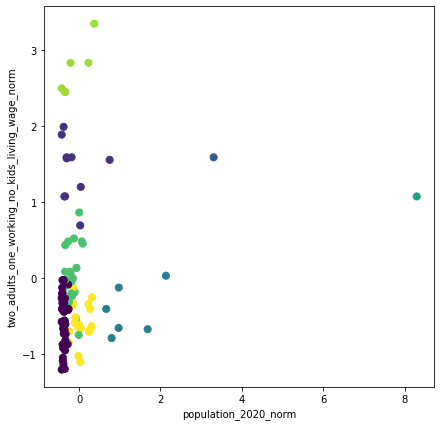

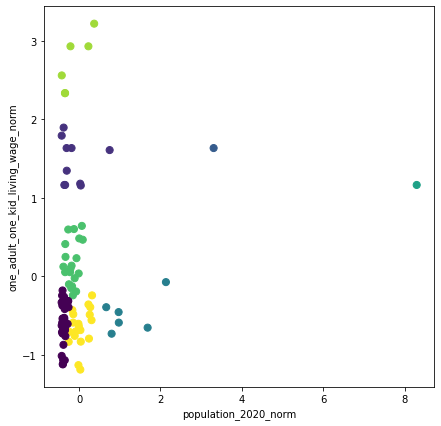

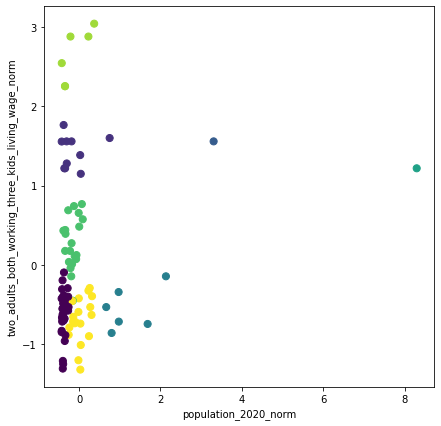

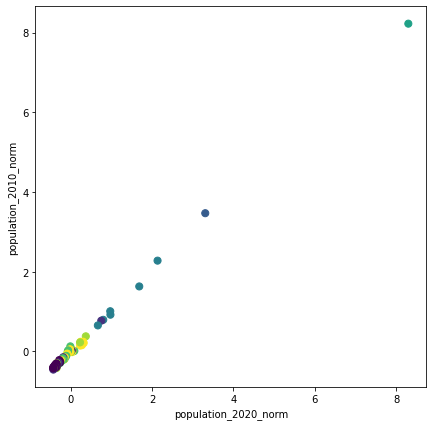

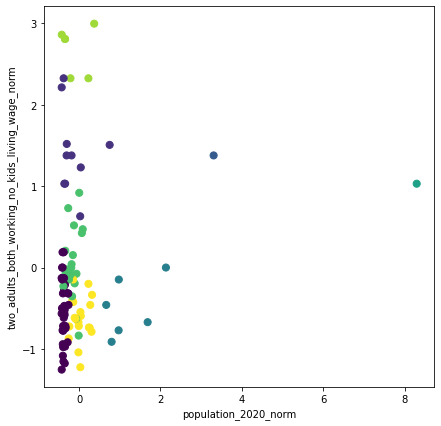

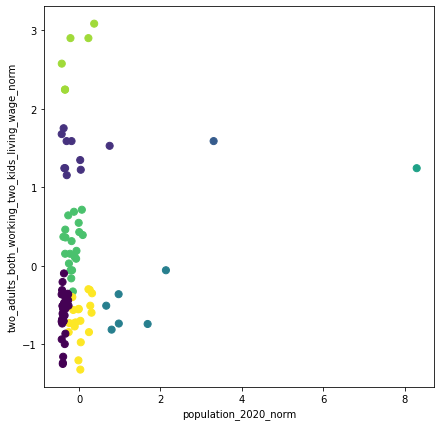

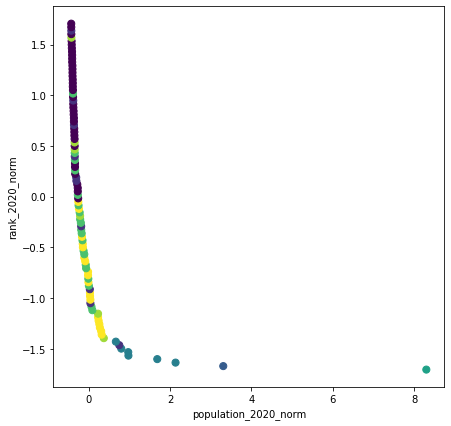

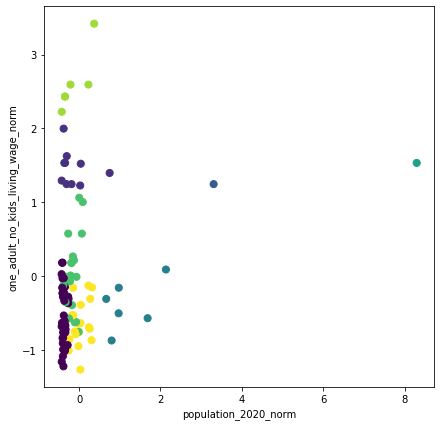

In [ ]:
makePlots(dataframe_,y_Kmeans)

Write code to calculate the within cluster sum of squares (WCSS). 
Recall the within cluster sum of squares (WCSS) is a measure of the squared average sum of squares of all points within the cluster to the cluster centroid.

The WCSS is unlike the between cluster sum of squares (BCSS) measures the square average of the distance between the clusters.

#### ************** Write code to calculate the Within Cluster Sum of Squares (WCSS)  *****************

In [ ]:
def calculateWCSS(num_clusters, kmeansDataFrame, random_state = 42):
    
    # num_clusters is the number of clusters that will be analyzed for WCSS
    # kmeansDataFrame contains the normalized feature(s) 
    # This code uses the Elbow methodology for analyzing the optimal number of clusters
    
    wcss = []
    # Ensure that only numerical variables are used for this analysis
    kmeansDataFrame_ = kmeansDataFrame[list(kmeansDataFrame.describe().columns)]
    
    for i in range(1,num_clusters):
        
        k_means = KMeans(n_clusters=i, random_state= random_state)
        k_means.fit(kmeansDataFrame_)
        wcss.append(k_means.inertia_)
    
    plt.plot(np.arange(1,num_clusters),wcss)
    plt.xlabel('Clusters')
    plt.ylabel('SSE')
    plt.show()
    
    
    
    return wcss

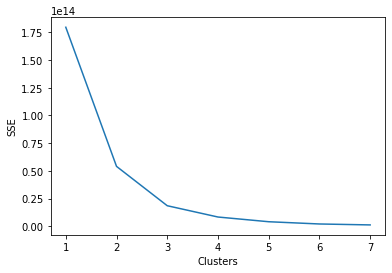

[179608431330824.44,
 54066918365648.63,
 18565711463336.82,
 8375491225535.248,
 4124037453454.2305,
 2095213224285.3042,
 1249292978360.5425]

In [ ]:
calculateWCSS(8,dataframe_)

### Run the cell below and verify that it passed all the unit test before continuing

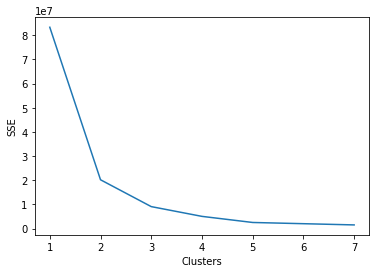

Passed all the unit Test -- congratulations .....


In [ ]:
_validateCalculateWCSS(calculateWCSS)

### CHALLENGE EXCERCISE NUMBER 1

THIS IS A CHALLENGE EXCERCISE!!

The goal of this excercise is to pick any 2 dimensions in the features dataset and show the center of the cluster as well as a cluster radius for each cluster using matplotlib.plot

A better approach will be to use Principal Component Analysis to reduce dimensions down to 2 and then do clustering on those 2 dimensions. 

Note that this is a challenge excercise for the students - Students are encouraged to do the excercise but no penalties if students decide not to do the excercise.

#### ************* Write code that takes 2 feature dimension, number of clusters as parameters 

[3.8036660983124113, 3.5904676720893, 3.084024618484095]


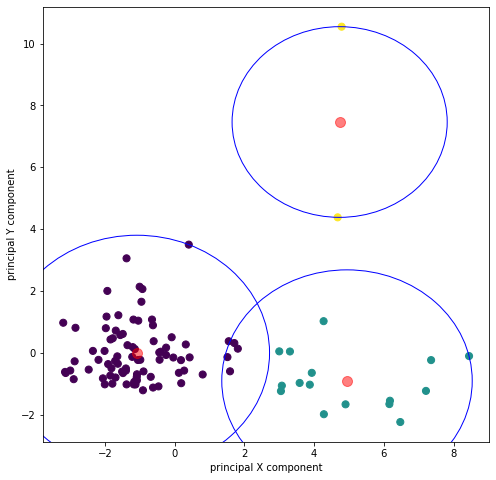

In [ ]:
from sklearn.decomposition import PCA

# Hint #1 - Select the specific columns that are normalized and convert them into numpy arrays

newarray = dataframe_[[colName for colName in list(dataframe_.describe().columns) if '_norm' in colName]].to_numpy()

# Hint #2 - Do Principal component analysis to reduce dimension down to 2 to make it easier for visualization purposes

pcal = PCA(n_components=2)
val = pcal.fit_transform(newarray)

# Hint #3 - Do K-means clustering and choose the number of clusters 

means = KMeans(n_clusters=3)
means.fit(val)
y_means = means.predict(val)

# Hint #4 - Do a scatter plot of the X-Component vs Y-Component

fig, ax = plt.subplots(figsize=(8,8)) 
fig = plt.scatter(val[:,0],val[:,1] , c=y_means, s=50, cmap='viridis')

centers = means.cluster_centers_
label1 = means.labels_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel('principal X component')
plt.ylabel('principal Y component')


# Hint #5 - Getting the Radii of the circles for each of the 3 labels identified
YMax = []
ValueLabels = []
for iii in list(np.unique(label1)):
    YValues = []
    for ii in range(len(label1)):
        if label1[ii] == iii:
            YY = list(centers[iii])
            
            RValues = ((YY[0] - val[ii][0])**2 + (YY[1] - val[ii][1])**2)**0.5
            YValues.append(RValues)
    
    YMax.append(max(YValues))
    ValueLabels.append(iii)
print(YMax)


# Hint #6 - Plotting the circles
circle1 = plt.Circle(((list(centers[0])[0]), (list(centers[0])[1])), YMax[0], color='blue', fill=False)
circle2 = plt.Circle(((list(centers[1])[0]), (list(centers[1])[1])), YMax[1], color='blue', fill=False)
circle3 = plt.Circle(((list(centers[2])[0]), (list(centers[2])[1])), YMax[2], color='blue', fill=False)

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)